# Libraries

In [1]:
# !pip install tensorflow-addons
# !pip3 install kagglehub

# #Installing Qiskit Packages
# !pip install qiskit
# !pip install qiskit_machine_learning
# !pip install qiskit_algorithms
# !pip install qiskit_ibm_runtime

In [40]:
from pathlib import Path
# import tensorflow as tf
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
import requests
import seaborn as sns

#Importing Libraries
from sklearn.svm import SVC

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#from qiskit.utils import algorithm_globals
from qiskit.circuit.library import PauliFeatureMap, ZZFeatureMap
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_machine_learning.algorithms.classifiers import QSVC
from qiskit.circuit import QuantumCircuit
from qiskit import transpile
from qiskit.circuit.library import RealAmplitudes
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import BaseSampler
#from qiskit.primitives import Sampler
#from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, SamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

from sklearn.pipeline import make_pipeline
from qiskit_machine_learning.state_fidelities import ComputeUncompute
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit import transpile
from sklearn.svm import SVC
import pandas as pd
import time

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import adjusted_rand_score
from qiskit import transpile, QuantumCircuit

np.random.seed(42)
#algorithm_globals.random_seed = 123

# Dataset

[ClaMp](https://www.kaggle.com/code/ssmohanty/dimensionality-reduction-techniques)

In [4]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("saurabhshahane/classification-of-malwares")

# print("Path to dataset files:", path)

In [5]:
import pandas as pd
import os

# Define the dataset path
dataset_path = "/Users/sthefaniepasso/.cache/kagglehub/datasets/saurabhshahane/classification-of-malwares/versions/1"

# List files in the directory to find the CSV file
files = os.listdir(dataset_path)
csv_files = [f for f in files if f.endswith('.csv')]

# Load the first CSV file (assuming there's only one)
if csv_files:
    df = pd.read_csv(os.path.join(dataset_path, csv_files[0]))
    print("CSV found and send to df")  # Display first few rows
else:
    print("No CSV file found in the dataset directory.")

#/home/ats852/.cache/kagglehub/datasets/saurabhshahane/classification-of-malwares/versions/1

CSV found and send to df


In [6]:
df.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,class
0,23117,144,3,0,4,0,65535,0,184,0,...,1194954,3,64,1048576,4096,1048576,4096,0,16,0
1,23117,144,3,0,4,0,65535,0,184,0,...,0,2,0,1048576,4096,1048576,4096,0,16,0
2,23117,144,3,0,4,0,65535,0,184,0,...,67688,2,320,1048576,4096,1048576,4096,0,16,0
3,23117,144,3,0,4,0,65535,0,184,0,...,113668,2,1344,1048576,4096,1048576,4096,0,16,0
4,23117,144,3,0,4,0,65535,0,184,0,...,69089,2,33088,262144,8192,1048576,4096,0,16,0


In [7]:
target = 'class'

In [8]:
import pandas as pd

def create_balanced_sample(df, target_column='class', num_samples=1000):
    # Ensure that num_samples is even to allow 50/50 split
    if num_samples % 2 != 0:
        raise ValueError("Number of samples must be even to ensure 50% distribution of labels.")

    # Split the data into two groups: one for each class
    class_0 = df[df[target_column] == 0]
    class_1 = df[df[target_column] == 1]
    
    # Find the minimum number of samples between the two classes to avoid imbalance issues
    min_class_size = min(len(class_0), len(class_1))
    
    if min_class_size * 2 < num_samples:
        raise ValueError(f"Not enough data to create a balanced dataset of {num_samples} samples.")

    # Sample from each class to ensure 50/50 split
    half_samples = num_samples // 2
    class_0_sample = class_0.sample(n=half_samples)
    class_1_sample = class_1.sample(n=half_samples)
    
    # Concatenate the two samples to form the balanced dataset
    df_n = pd.concat([class_0_sample, class_1_sample]).sample(frac=1).reset_index(drop=True)  # Shuffle and reset index
    
    return df_n

# Usage
df = df.drop(columns=["e_magic", "e_crlc"])
y = df[target]
X = df.drop(columns=[target])

# Create balanced sample
df_n = create_balanced_sample(df)
print(df_n.shape)

(1000, 54)


In [9]:
print(df.isna().sum())

e_cblp                            0
e_cp                              0
e_cparhdr                         0
e_minalloc                        0
e_maxalloc                        0
e_ss                              0
e_sp                              0
e_csum                            0
e_ip                              0
e_cs                              0
e_lfarlc                          0
e_ovno                            0
e_res                          5184
e_oemid                           0
e_oeminfo                         0
e_res2                         5184
e_lfanew                          0
Machine                           0
NumberOfSections                  0
CreationYear                      0
PointerToSymbolTable              0
NumberOfSymbols                   0
SizeOfOptionalHeader              0
Characteristics                   0
Magic                             0
MajorLinkerVersion                0
MinorLinkerVersion                0
SizeOfCode                  

In [10]:
#df.dropna(axis=1, inplace=True)
df_cleaned = df.dropna(axis=1)
print(df.isna().sum())

e_cblp                            0
e_cp                              0
e_cparhdr                         0
e_minalloc                        0
e_maxalloc                        0
e_ss                              0
e_sp                              0
e_csum                            0
e_ip                              0
e_cs                              0
e_lfarlc                          0
e_ovno                            0
e_res                          5184
e_oemid                           0
e_oeminfo                         0
e_res2                         5184
e_lfanew                          0
Machine                           0
NumberOfSections                  0
CreationYear                      0
PointerToSymbolTable              0
NumberOfSymbols                   0
SizeOfOptionalHeader              0
Characteristics                   0
Magic                             0
MajorLinkerVersion                0
MinorLinkerVersion                0
SizeOfCode                  

# Correlation Heatmaps with Hierarchical Clustering

[Examples](https://www.kaggle.com/code/sgalella/correlation-heatmaps-with-hierarchical-clustering)

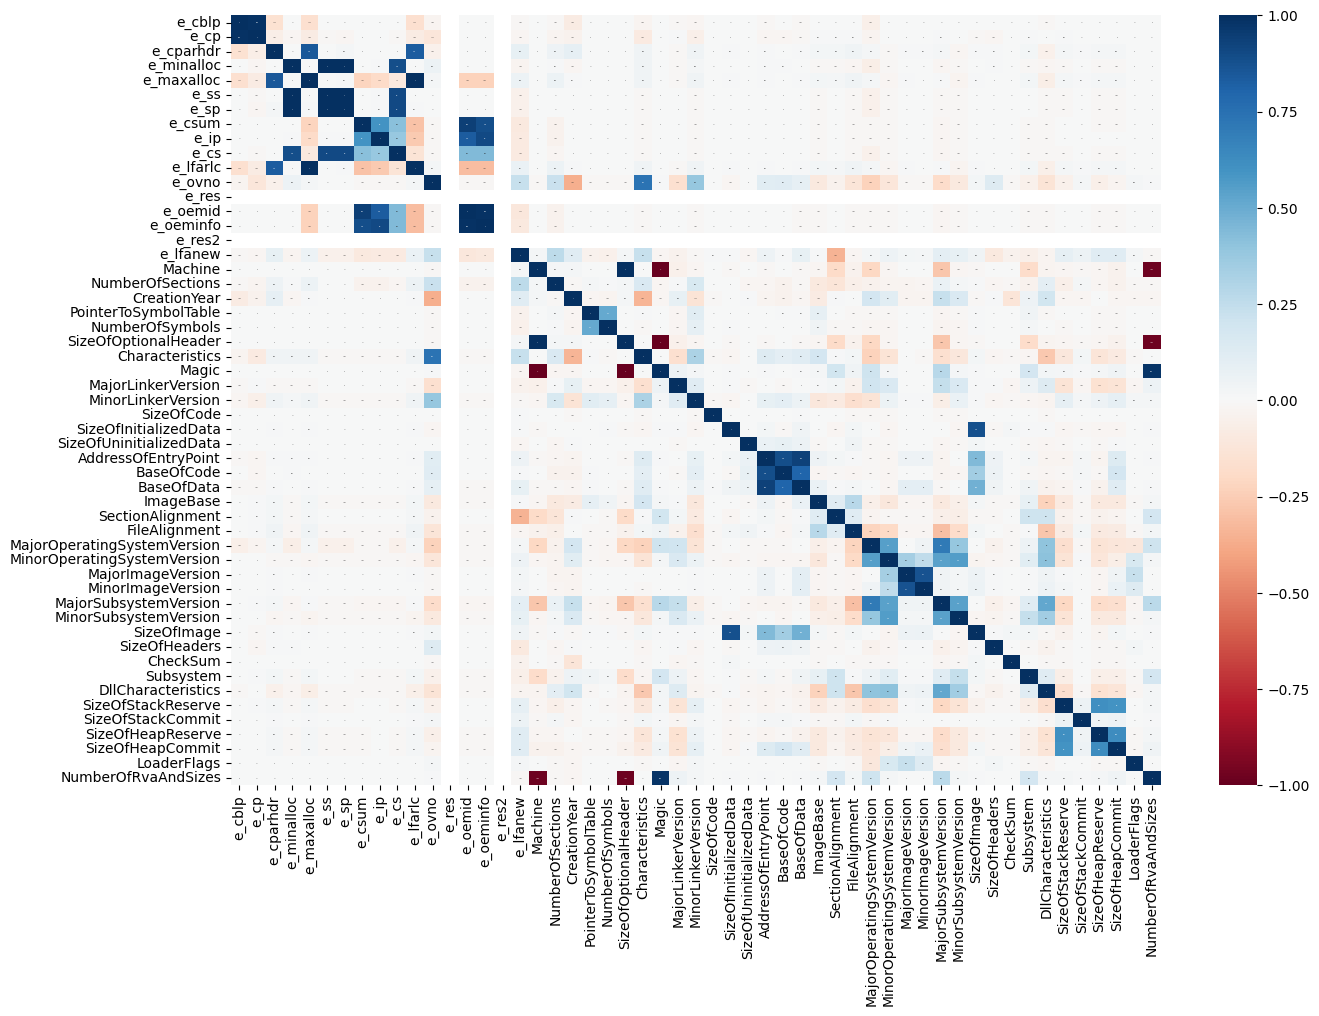

In [11]:
data = df.drop(columns=[target])#'Class',
plt.figure(figsize=(15,10))
correlations = data.corr()
sns.heatmap(round(correlations,2), cmap='RdBu', annot=True, 
            annot_kws={"size": 0.2}, vmin=-1, vmax=1);

In [22]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform

class MinimalDataProcessor:
    def __init__(self, dataset_path, target_col='class', exclude_cols=None, num_samples=1000):
        self.dataset_path = dataset_path
        self.target_col = target_col
        self.exclude_cols = exclude_cols or ["e_magic", "e_crlc"]
        self.num_samples = num_samples
        self.df = None
        self.feature_2to10 = []
        self.all_features = []  # Store all features for "all" option
    
    def load_and_balance_data(self):
        # Load CSV
        csv_files = [f for f in os.listdir(self.dataset_path) if f.endswith('.csv')]
        self.df = pd.read_csv(os.path.join(self.dataset_path, csv_files[0]))
        
        # Drop excluded columns and balance dataset
        self.df = self.df.drop(columns=self.exclude_cols, errors='ignore')
        class_0 = self.df[self.df[self.target_col] == 0].sample(n=self.num_samples//2)
        class_1 = self.df[self.df[self.target_col] == 1].sample(n=self.num_samples//2)
        self.df = pd.concat([class_0, class_1]).sample(frac=1).reset_index(drop=True)
        
        # Store all features (excluding target)
        self.all_features = [col for col in self.df.columns if col != self.target_col]
        
        return self.df
    
    def _get_representative_feature(self, cluster_features, corr_matrix):
        if len(cluster_features) == 1:
            return cluster_features[0]
        scores = {f: np.mean([abs(corr_matrix.loc[f, other]) 
                            for other in cluster_features if other != f]) 
                 for f in cluster_features}
        return max(scores, key=scores.get)
    
    def generate_feature_clusters(self, min_clusters=2, max_clusters=10):
        data = self.df.drop(columns=[self.target_col])
        
        # Remove constant features that cause correlation issues
        data = data.loc[:, data.std() > 1e-6]
        
        correlations = data.corr().abs().fillna(0)
        
        # Clip correlations to valid range [0, 1]
        correlations = correlations.clip(0, 1)
        
        # Create dissimilarity matrix
        dissimilarity = 1 - correlations
        
        # Ensure perfect symmetry and valid distance properties
        dissimilarity = (dissimilarity + dissimilarity.T) / 2
        np.fill_diagonal(dissimilarity.values, 0)  # Distance to self = 0
        
        # Ensure all values are non-negative
        dissimilarity = dissimilarity.clip(0, None)
        
        try:
            Z = linkage(squareform(dissimilarity), 'ward')
        except ValueError:
            # Fallback: use average linkage if ward fails
            Z = linkage(squareform(dissimilarity), 'average')
        
        for n_clusters in range(min_clusters, max_clusters + 1):
            labels = fcluster(Z, n_clusters, criterion='maxclust')
            
            # Group features by cluster
            clusters = {}
            for idx, feature in enumerate(data.columns):
                cluster_id = labels[idx]
                clusters.setdefault(cluster_id, []).append(feature)
            
            # Get representative features
            representatives = [self._get_representative_feature(features, correlations) 
                             for features in clusters.values()]
            self.feature_2to10.append(representatives)
        
        return self.feature_2to10
    
    def _cluster_and_reorder_features(self, features, n_clusters=None):
        """Cluster features and return them ordered by cluster groups"""
        if len(features) <= 1:
            return features
        
        data = self.df[features]
        correlations = data.corr().abs().fillna(0).clip(0, 1)
        dissimilarity = 1 - correlations
        dissimilarity = (dissimilarity + dissimilarity.T) / 2
        np.fill_diagonal(dissimilarity.values, 0)
        dissimilarity = dissimilarity.clip(0, None)
        
        try:
            Z = linkage(squareform(dissimilarity), 'ward')
        except ValueError:
            Z = linkage(squareform(dissimilarity), 'average')
        
        # Determine number of clusters
        if n_clusters is None:
            n_clusters = min(10, max(2, len(features) // 5))
        
        cluster_labels = fcluster(Z, n_clusters, criterion='maxclust')
        
        # Group features by cluster and order them
        cluster_groups = {}
        for feature, cluster_id in zip(features, cluster_labels):
            cluster_groups.setdefault(cluster_id, []).append(feature)
        
        # Create ordered feature list (all cluster 1, then all cluster 2, etc.)
        ordered_features = []
        for cluster_id in sorted(cluster_groups.keys()):
            ordered_features.extend(sorted(cluster_groups[cluster_id]))
        
        return ordered_features
    
    def plot_10d_correlation_heatmap(self, figsize=(12, 10)):
        """Plot correlation heatmap with FORCED cluster grouping for 10D features"""
        if not self.feature_2to10:
            print("Run generate_feature_clusters() first")
            return
        
        # Get 10D features (index 8 = 10 clusters)
        features_10d = self.feature_2to10[8]  # 10D is at index 8 (10-2)
        
        # Force cluster grouping
        ordered_features, cluster_assignments = self._force_cluster_grouping(features_10d, n_clusters=5)
        data_10d = self.df[ordered_features]
        correlations = data_10d.corr()
        
        # Plot heatmap with forced cluster boundaries
        plt.figure(figsize=figsize)
        ax = sns.heatmap(correlations, annot=True, cmap='RdBu', 
                        vmin=-1, vmax=1, square=True, cbar_kws={'shrink': 0.8})
        
        # Add cluster boundaries based on forced grouping
        cluster_boundaries = self._get_cluster_boundaries(cluster_assignments)
        
        for boundary in cluster_boundaries:
            ax.axhline(y=boundary, color='white', linewidth=3)
            ax.axvline(x=boundary, color='white', linewidth=3)
        
        # Add cluster labels based on forced grouping
        cluster_starts = [0] + cluster_boundaries + [len(cluster_assignments)]
        for i in range(len(cluster_starts) - 1):
            start = cluster_starts[i]
            end = cluster_starts[i + 1]
            mid_point = (start + end) / 2
            cluster_id = cluster_assignments[start]
            
            ax.text(mid_point, -0.5, f'C{cluster_id}', 
                   fontweight='bold', fontsize=12, ha='center',
                   bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.8))
            ax.text(len(correlations) + 0.2, mid_point, f'C{cluster_id}', 
                   fontweight='bold', fontsize=12, ha='center', va='center',
                   bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.8))
        
        plt.title('10D Features Heatmap with FORCED Cluster Grouping', 
                 fontsize=14, pad=20)
        plt.tight_layout()
        plt.show()
        
        # Print cluster summary
        print(f"\n10D Features FORCED Clustering Summary:")
        print(f"Ordered features (grouped by cluster): {ordered_features}")
        self._print_forced_cluster_summary(ordered_features, cluster_assignments, "10D")
    
    def plot_10d_clustermap(self, figsize=(12, 12)):
        """Plot clustermap for 10D features with FORCED cluster grouping"""
        if not self.feature_2to10:
            print("Run generate_feature_clusters() first")
            return
        
        features_10d = self.feature_2to10[8]
        
        # Force cluster grouping
        ordered_features, cluster_assignments = self._force_cluster_grouping(features_10d, n_clusters=5)
        data_10d = self.df[ordered_features]
        correlations = data_10d.corr()
        
        # Create clustermap with clustering DISABLED to preserve our ordering
        g = sns.clustermap(correlations, method="complete", cmap='RdBu', 
                          annot=True, vmin=-1, vmax=1, figsize=figsize,
                          row_cluster=False, col_cluster=False, square=True)  # Disable clustering
        
        ax_heatmap = g.ax_heatmap
        
        # Add cluster boundaries based on forced grouping
        cluster_boundaries = self._get_cluster_boundaries(cluster_assignments)
        
        for boundary in cluster_boundaries:
            ax_heatmap.axhline(y=boundary, color='white', linewidth=3, alpha=0.9)
            ax_heatmap.axvline(x=boundary, color='white', linewidth=3, alpha=0.9)
        
        # Add forced cluster labels
        self._add_forced_cluster_labels(ax_heatmap, cluster_assignments, cluster_boundaries)
        
        g.fig.suptitle('10D Features with FORCED Cluster Grouping', fontsize=16, y=1.02)
        plt.show()
        
        # Print summary
        self._print_forced_cluster_summary(ordered_features, cluster_assignments, "10D")
    
    def get_features(self, n_clusters):
        """Get representative features for n clusters (2-10) or all features"""
        if n_clusters == "all":
            return self.all_features
        return self.feature_2to10[n_clusters - 2] if 2 <= n_clusters <= 10 else None
    
    def get_subset(self, n_clusters, include_target=True):
        """Get DataFrame with representative features"""
        features = self.get_features(n_clusters)
        if include_target and features:
            return self.df[features + [self.target_col]]
        return self.df[features] if features else None
    
    def _select_features_for_dimensions(self, n_dimensions):
        """Select features based on dimension count with intelligent selection"""
        if n_dimensions == "all":
            return self.all_features
            
        if n_dimensions <= 10:
            # Use feature_2to10 for dimensions 2-10
            return self.feature_2to10[n_dimensions - 2]
        else:
            # For >10 dimensions: use 10D features + add least correlated from each cluster
            base_features = self.feature_2to10[8]  # 10D features (index 8)
            selected_features = base_features.copy()
            
            if n_dimensions <= len(base_features):
                return selected_features[:n_dimensions]
            
            # Need more features - get original clustering data
            data = self.df.drop(columns=[self.target_col])
            data = data.loc[:, data.std() > 1e-6]
            correlations = data.corr().abs().fillna(0).clip(0, 1)
            dissimilarity = 1 - correlations
            dissimilarity = (dissimilarity + dissimilarity.T) / 2
            np.fill_diagonal(dissimilarity.values, 0)
            dissimilarity = dissimilarity.clip(0, None)
            
            try:
                Z = linkage(squareform(dissimilarity), 'ward')
            except ValueError:
                Z = linkage(squareform(dissimilarity), 'average')
            
            # Get 10 clusters to match our base features
            cluster_labels = fcluster(Z, 10, criterion='maxclust')
            
            # Group all features by their 10 clusters
            clusters = {}
            for idx, feature in enumerate(data.columns):
                cluster_id = cluster_labels[idx]
                clusters.setdefault(cluster_id, []).append(feature)
            
            # Map each base feature to its cluster
            feature_to_cluster = {}
            for cluster_id, cluster_features in clusters.items():
                for base_feature in base_features:
                    if base_feature in cluster_features:
                        feature_to_cluster[base_feature] = cluster_id
                        break
            
            # Add additional features from each cluster (least correlated to existing)
            additional_needed = n_dimensions - len(selected_features)
            added_count = 0
            
            # Cycle through clusters to add features evenly
            for cycle in range((additional_needed // len(feature_to_cluster)) + 1):
                if added_count >= additional_needed:
                    break
                    
                for base_feature in base_features:
                    if added_count >= additional_needed:
                        break
                        
                    cluster_id = feature_to_cluster.get(base_feature)
                    if cluster_id is None:
                        continue
                        
                    cluster_features = clusters[cluster_id]
                    available_features = [f for f in cluster_features if f not in selected_features]
                    
                    if not available_features:
                        continue
                    
                    # Find feature least correlated with the base feature from this cluster
                    correlations_with_base = {}
                    for candidate in available_features:
                        corr_val = abs(correlations.loc[base_feature, candidate])
                        correlations_with_base[candidate] = corr_val
                    
                    # Select feature with lowest correlation to base feature
                    least_correlated = min(correlations_with_base.keys(), 
                                         key=correlations_with_base.get)
                    selected_features.append(least_correlated)
                    added_count += 1
            
            return selected_features[:n_dimensions]  # Ensure exact count
    
    def plot_features_clustermap(self, n_dimensions, figsize=(16, 16)):
        """Plot hierarchical clustermap for selected features with cluster boundary lines and FORCED grouped features"""
        if self.df is None:
            print("Load data first")
            return
        
        # Select features based on dimensions
        if n_dimensions != "all" and n_dimensions <= 10 and not self.feature_2to10:
            print("Run generate_feature_clusters() first for dimensions <= 10")
            return
        
        selected_features = self._select_features_for_dimensions(n_dimensions)
        
        if not selected_features:
            print(f"Could not select features for {n_dimensions} dimensions")
            return
        
        print(f"Selected {len(selected_features)} features for {n_dimensions}D visualization:")
        if n_dimensions == "all":
            print(f"Using ALL features: {len(selected_features)} total")
        elif n_dimensions <= 10:
            print(f"Using feature_2to10[{n_dimensions-2}]: {selected_features}")
        else:
            base_features = self.feature_2to10[8]
            additional_features = [f for f in selected_features if f not in base_features]
            print(f"Base 10D features: {base_features}")
            print(f"Additional features (least correlated within clusters): {additional_features}")
        
        # FORCE CLUSTER GROUPING - this is the key fix
        if n_dimensions == "all":
            n_clusters = min(15, max(5, len(selected_features) // 10))  # Adaptive for large datasets
        else:
            n_clusters = min(10, len(selected_features))
        
        ordered_features, cluster_assignments = self._force_cluster_grouping(selected_features, n_clusters=n_clusters)
        
        data_selected = self.df[ordered_features]
        correlations = data_selected.corr().fillna(0).clip(-1, 1)
        correlations = correlations.replace([np.inf, -np.inf], 0)
        correlations = (correlations + correlations.T) / 2
        
        try:
            # Determine annotation and font size based on number of features
            show_annotations = len(ordered_features) <= 20
            annot_fontsize = max(8, 16 - len(ordered_features) // 3)  # Bigger font, adaptive
            
            # Create clustermap but DISABLE clustering to preserve our ordering
            g = sns.clustermap(correlations, method="complete", cmap='RdBu', 
                              annot=show_annotations, 
                              annot_kws={"size": annot_fontsize},  # Bigger correlation numbers
                              fmt='.2f',  # 2 decimal places
                              vmin=-1, vmax=1, figsize=figsize,
                              row_cluster=False, col_cluster=False, square=True)  # DISABLE clustering
            
            ax_heatmap = g.ax_heatmap
            
            # Add cluster boundaries based on our forced grouping
            cluster_boundaries = self._get_cluster_boundaries(cluster_assignments)
            
            for boundary in cluster_boundaries:
                ax_heatmap.axhline(y=boundary, color='white', linewidth=4, alpha=0.9)
                ax_heatmap.axvline(x=boundary, color='white', linewidth=4, alpha=0.9)
            
            # Add cluster labels based on our forced grouping
            self._add_forced_cluster_labels(ax_heatmap, cluster_assignments, cluster_boundaries)
            
            title_suffix = f"ALL ({len(selected_features)})" if n_dimensions == "all" else f"{n_dimensions}D"
            title = f'{title_suffix} Features with FORCED Cluster Grouping ({n_clusters} clusters)'
            g.fig.suptitle(title, fontsize=14, y=1.02)
            plt.show()
            
            # Print cluster summary
            self._print_forced_cluster_summary(ordered_features, cluster_assignments, n_dimensions)
            
        except Exception as e:
            print(f"Error creating clustermap: {e}")
    
    def _force_cluster_grouping(self, features, n_clusters=None):
        """Force features to be grouped by clusters and return ordered features with cluster assignments"""
        if len(features) <= 1:
            return features, [1] * len(features)
        
        data = self.df[features]
        correlations = data.corr().abs().fillna(0).clip(0, 1)
        dissimilarity = 1 - correlations
        dissimilarity = (dissimilarity + dissimilarity.T) / 2
        np.fill_diagonal(dissimilarity.values, 0)
        dissimilarity = dissimilarity.clip(0, None)
        
        try:
            Z = linkage(squareform(dissimilarity), 'ward')
        except ValueError:
            Z = linkage(squareform(dissimilarity), 'average')
        
        # Determine number of clusters
        if n_clusters is None:
            n_clusters = min(10, max(2, len(features) // 5))
        
        cluster_labels = fcluster(Z, n_clusters, criterion='maxclust')
        
        # Group features by cluster and force them to be together
        cluster_groups = {}
        for feature, cluster_id in zip(features, cluster_labels):
            cluster_groups.setdefault(cluster_id, []).append(feature)
        
        # Create ordered feature list (all cluster 1, then all cluster 2, etc.)
        ordered_features = []
        ordered_cluster_assignments = []
        
        for cluster_id in sorted(cluster_groups.keys()):
            cluster_features = sorted(cluster_groups[cluster_id])  # Sort within cluster
            ordered_features.extend(cluster_features)
            ordered_cluster_assignments.extend([cluster_id] * len(cluster_features))
        
        print(f"FORCED grouping: Features ordered by clusters")
        for cluster_id in sorted(cluster_groups.keys()):
            print(f"  Cluster {cluster_id}: {cluster_groups[cluster_id]}")
        
        return ordered_features, ordered_cluster_assignments
    
    def _get_cluster_boundaries(self, cluster_assignments):
        """Get cluster boundary positions from cluster assignments"""
        boundaries = []
        current_cluster = cluster_assignments[0]
        for i, cluster_id in enumerate(cluster_assignments):
            if cluster_id != current_cluster:
                boundaries.append(i)
                current_cluster = cluster_id
        return boundaries
    
    def _add_forced_cluster_labels(self, ax, cluster_assignments, cluster_boundaries):
        """Add cluster labels based on forced cluster grouping"""
        cluster_starts = [0] + cluster_boundaries + [len(cluster_assignments)]
        
        for i in range(len(cluster_starts) - 1):
            start = cluster_starts[i]
            end = cluster_starts[i + 1]
            mid_point = (start + end) / 2
            cluster_id = cluster_assignments[start]
            
            # Row labels (LEFT)
            ax.text(-1.5, mid_point, f'C{cluster_id}', 
                   fontweight='bold', fontsize=12, ha='center', va='center',
                   bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.8))
            
            # Column labels (TOP)
            ax.text(mid_point, -1.5, f'C{cluster_id}', 
                   fontweight='bold', fontsize=12, ha='center', va='center',
                   bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.8))
    
    def _print_forced_cluster_summary(self, ordered_features, cluster_assignments, n_dimensions):
        """Print summary of forced cluster grouping"""
        print(f"\nFORCED Cluster Summary for {n_dimensions}:")
        print(f"Features are GUARANTEED to be grouped by cluster (no dendrogram reordering)")
        print(f"Ordered features: {ordered_features}")
        
        # Group features by cluster for summary
        cluster_groups = {}
        for feature, cluster_id in zip(ordered_features, cluster_assignments):
            cluster_groups.setdefault(cluster_id, []).append(feature)
        
        print(f"\nCluster groups (in matrix order):")
        for cluster_id in sorted(cluster_groups.keys()):
            features = cluster_groups[cluster_id]
            print(f"Cluster {cluster_id} ({len(features)} features): {features}")
    
    
    def _find_boundaries(self, cluster_labels):
        """Find cluster boundary positions"""
        boundaries = []
        current_cluster = cluster_labels[0]
        for i, cluster_id in enumerate(cluster_labels):
            if cluster_id != current_cluster:
                boundaries.append(i)
                current_cluster = cluster_id
        return boundaries
    
    def _add_external_cluster_labels(self, ax, row_boundaries, col_boundaries, row_labels, col_labels):
        """Add cluster labels OUTSIDE the correlation matrix (to the left and top)"""
        # Row cluster labels on the LEFT (outside the matrix)
        row_starts = [0] + row_boundaries + [len(row_labels)]
        for i in range(len(row_starts) - 1):
            start = row_starts[i]
            end = row_starts[i + 1]
            mid_point = (start + end) / 2
            cluster_id = row_labels[start] if start < len(row_labels) else row_labels[-1]
            
            ax.text(-1.5, mid_point, f'C{cluster_id}', 
                   fontweight='bold', fontsize=12, ha='center', va='center',
                   bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.8))
        
        # Column cluster labels at the TOP (outside the matrix)
        col_starts = [0] + col_boundaries + [len(col_labels)]
        for i in range(len(col_starts) - 1):
            start = col_starts[i]
            end = col_starts[i + 1]
            mid_point = (start + end) / 2
            cluster_id = col_labels[start] if start < len(col_labels) else col_labels[-1]
            
            ax.text(mid_point, -1.5, f'C{cluster_id}', 
                   fontweight='bold', fontsize=12, ha='center', va='center',
                   bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.8))
    
    def run_all(self, plotd=10):
        """Complete pipeline with customizable dimension plotting"""
        self.load_and_balance_data()
        
        if plotd != "all":
            self.generate_feature_clusters()
            print(f"Generated feature_2to10 with {len(self.feature_2to10)} entries")
            for i, features in enumerate(self.feature_2to10):
                print(f"  {i+2}D: {len(features)} features - {features}")
        else:
            print(f"Processing ALL features: {len(self.all_features)} total")
            # Still generate clustering for consistency but won't use feature_2to10
            self.generate_feature_clusters()
        
        if plotd:
            if plotd == "all":
                print(f"\nGenerating correlation plot for ALL {len(self.all_features)} features...")
            else:
                print(f"\nGenerating {plotd}D correlation plots...")
            
            if plotd == 10:
                # Special case: show both 10D specific plots and clustermap
                self.plot_10d_correlation_heatmap()
                self.plot_10d_clustermap()
            
            # Always show the customizable clustermap
            self.plot_features_clustermap(plotd)
        
        return self.feature_2to10 if plotd != "all" else self.all_features

# Usage:
"""
processor = MinimalDataProcessor(
    dataset_path="/path/to/dataset"
)

# Plot all features with grouped clusters
all_features = processor.run_all(plotd="all")

# Plot 52D with grouped clusters
feature_52d = processor.run_all(plotd=52)

# Plot 10D with special plots
feature_10d = processor.run_all(plotd=10)
"""

'\nprocessor = MinimalDataProcessor(\n    dataset_path="/path/to/dataset"\n)\n\n# Plot all features with grouped clusters\nall_features = processor.run_all(plotd="all")\n\n# Plot 52D with grouped clusters\nfeature_52d = processor.run_all(plotd=52)\n\n# Plot 10D with special plots\nfeature_10d = processor.run_all(plotd=10)\n'

Generated feature_2to10 with 9 entries
  2D: 2 features - ['e_cblp', 'SizeOfCode']
  3D: 3 features - ['e_cblp', 'MajorSubsystemVersion', 'SizeOfCode']
  4D: 4 features - ['e_cblp', 'MajorSubsystemVersion', 'Machine', 'SizeOfCode']
  5D: 5 features - ['e_minalloc', 'e_maxalloc', 'MajorSubsystemVersion', 'Machine', 'SizeOfCode']
  6D: 6 features - ['e_minalloc', 'e_maxalloc', 'SizeOfStackReserve', 'Machine', 'SizeOfCode', 'MajorSubsystemVersion']
  7D: 7 features - ['e_minalloc', 'e_maxalloc', 'MinorLinkerVersion', 'Machine', 'SizeOfCode', 'MajorSubsystemVersion', 'SizeOfStackReserve']
  8D: 8 features - ['e_minalloc', 'e_maxalloc', 'SectionAlignment', 'Machine', 'MinorLinkerVersion', 'SizeOfCode', 'MajorSubsystemVersion', 'SizeOfStackReserve']
  9D: 9 features - ['e_minalloc', 'e_maxalloc', 'e_lfanew', 'Machine', 'MinorLinkerVersion', 'SizeOfCode', 'FileAlignment', 'MajorSubsystemVersion', 'SizeOfStackReserve']
  10D: 10 features - ['e_minalloc', 'e_maxalloc', 'e_lfanew', 'Machine', 'B

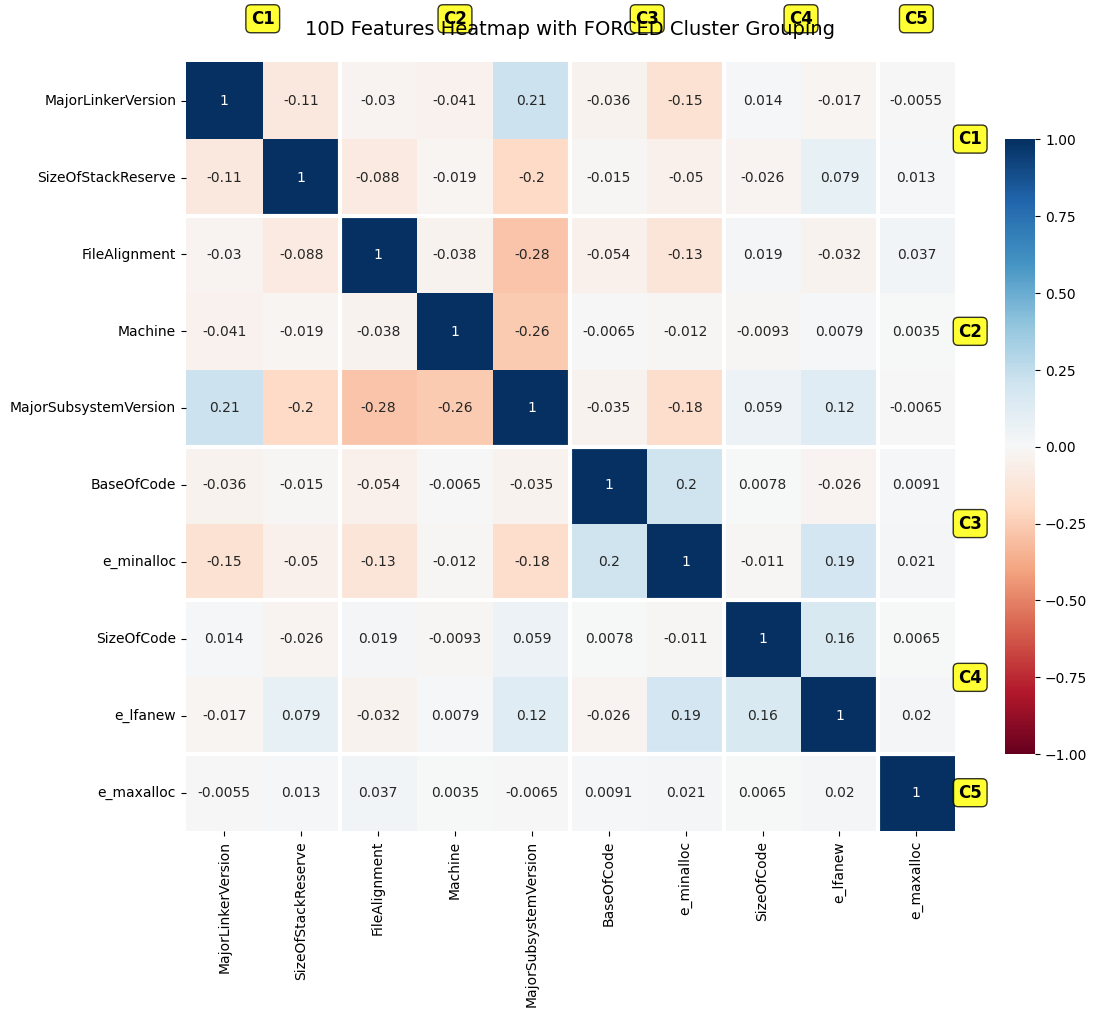


10D Features FORCED Clustering Summary:
Ordered features (grouped by cluster): ['MajorLinkerVersion', 'SizeOfStackReserve', 'FileAlignment', 'Machine', 'MajorSubsystemVersion', 'BaseOfCode', 'e_minalloc', 'SizeOfCode', 'e_lfanew', 'e_maxalloc']

FORCED Cluster Summary for 10D:
Features are GUARANTEED to be grouped by cluster (no dendrogram reordering)
Ordered features: ['MajorLinkerVersion', 'SizeOfStackReserve', 'FileAlignment', 'Machine', 'MajorSubsystemVersion', 'BaseOfCode', 'e_minalloc', 'SizeOfCode', 'e_lfanew', 'e_maxalloc']

Cluster groups (in matrix order):
Cluster 1 (2 features): ['MajorLinkerVersion', 'SizeOfStackReserve']
Cluster 2 (3 features): ['FileAlignment', 'Machine', 'MajorSubsystemVersion']
Cluster 3 (2 features): ['BaseOfCode', 'e_minalloc']
Cluster 4 (2 features): ['SizeOfCode', 'e_lfanew']
Cluster 5 (1 features): ['e_maxalloc']
FORCED grouping: Features ordered by clusters
  Cluster 1: ['MajorLinkerVersion', 'SizeOfStackReserve']
  Cluster 2: ['Machine', 'FileAl

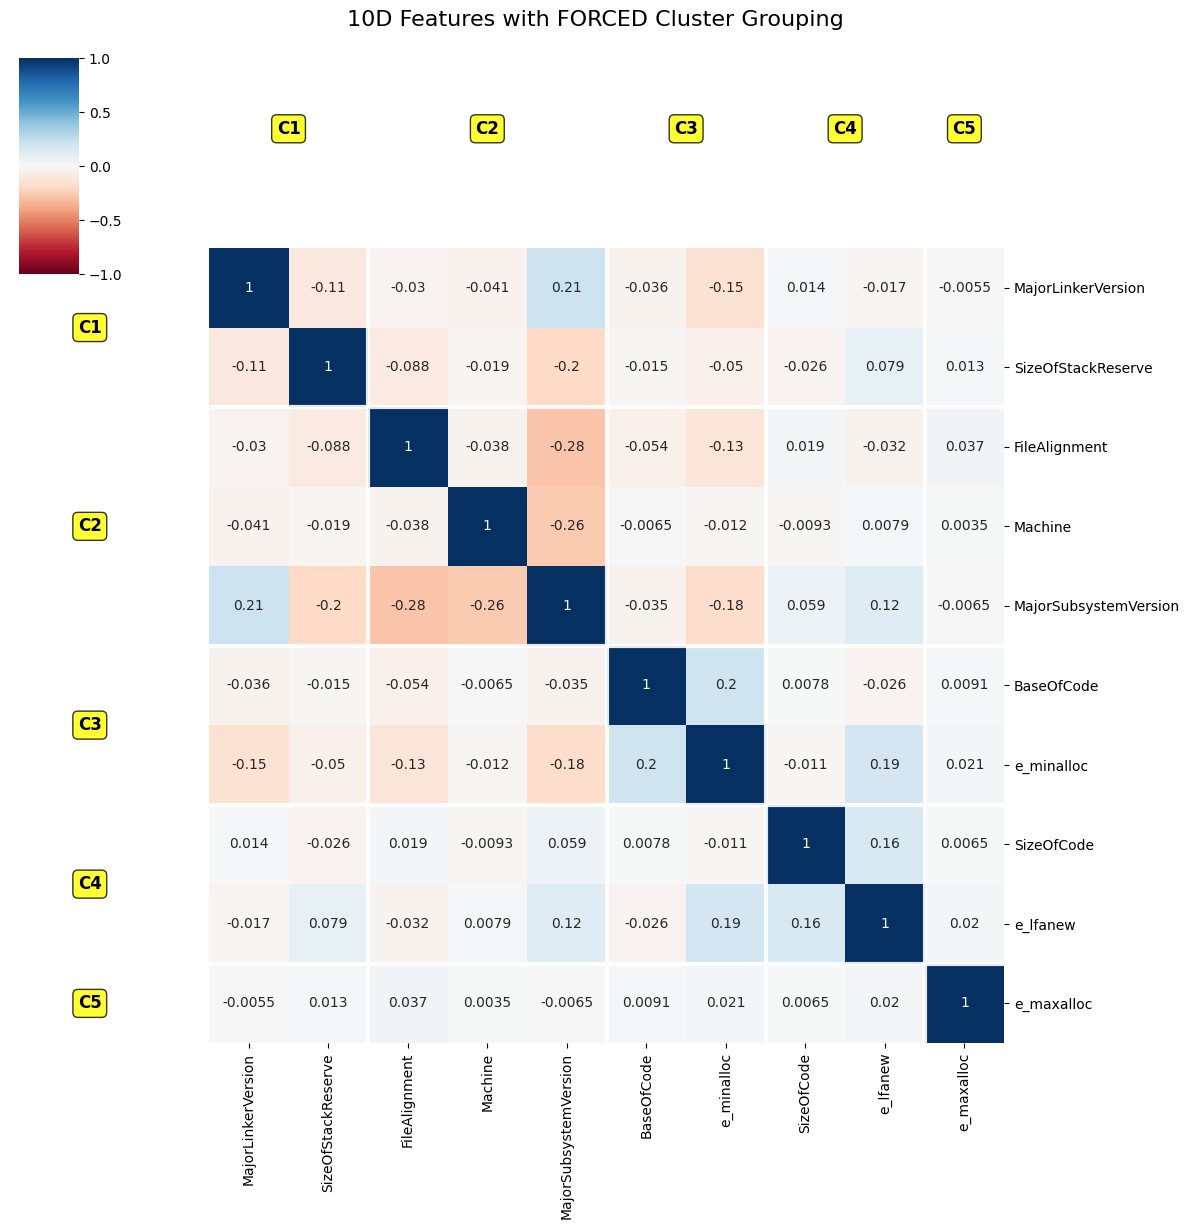


FORCED Cluster Summary for 10D:
Features are GUARANTEED to be grouped by cluster (no dendrogram reordering)
Ordered features: ['MajorLinkerVersion', 'SizeOfStackReserve', 'FileAlignment', 'Machine', 'MajorSubsystemVersion', 'BaseOfCode', 'e_minalloc', 'SizeOfCode', 'e_lfanew', 'e_maxalloc']

Cluster groups (in matrix order):
Cluster 1 (2 features): ['MajorLinkerVersion', 'SizeOfStackReserve']
Cluster 2 (3 features): ['FileAlignment', 'Machine', 'MajorSubsystemVersion']
Cluster 3 (2 features): ['BaseOfCode', 'e_minalloc']
Cluster 4 (2 features): ['SizeOfCode', 'e_lfanew']
Cluster 5 (1 features): ['e_maxalloc']
Selected 10 features for 10D visualization:
Using feature_2to10[8]: ['e_minalloc', 'e_maxalloc', 'e_lfanew', 'Machine', 'BaseOfCode', 'MajorLinkerVersion', 'SizeOfCode', 'FileAlignment', 'MajorSubsystemVersion', 'SizeOfStackReserve']
FORCED grouping: Features ordered by clusters
  Cluster 1: ['MajorLinkerVersion']
  Cluster 2: ['SizeOfStackReserve']
  Cluster 3: ['FileAlignment',

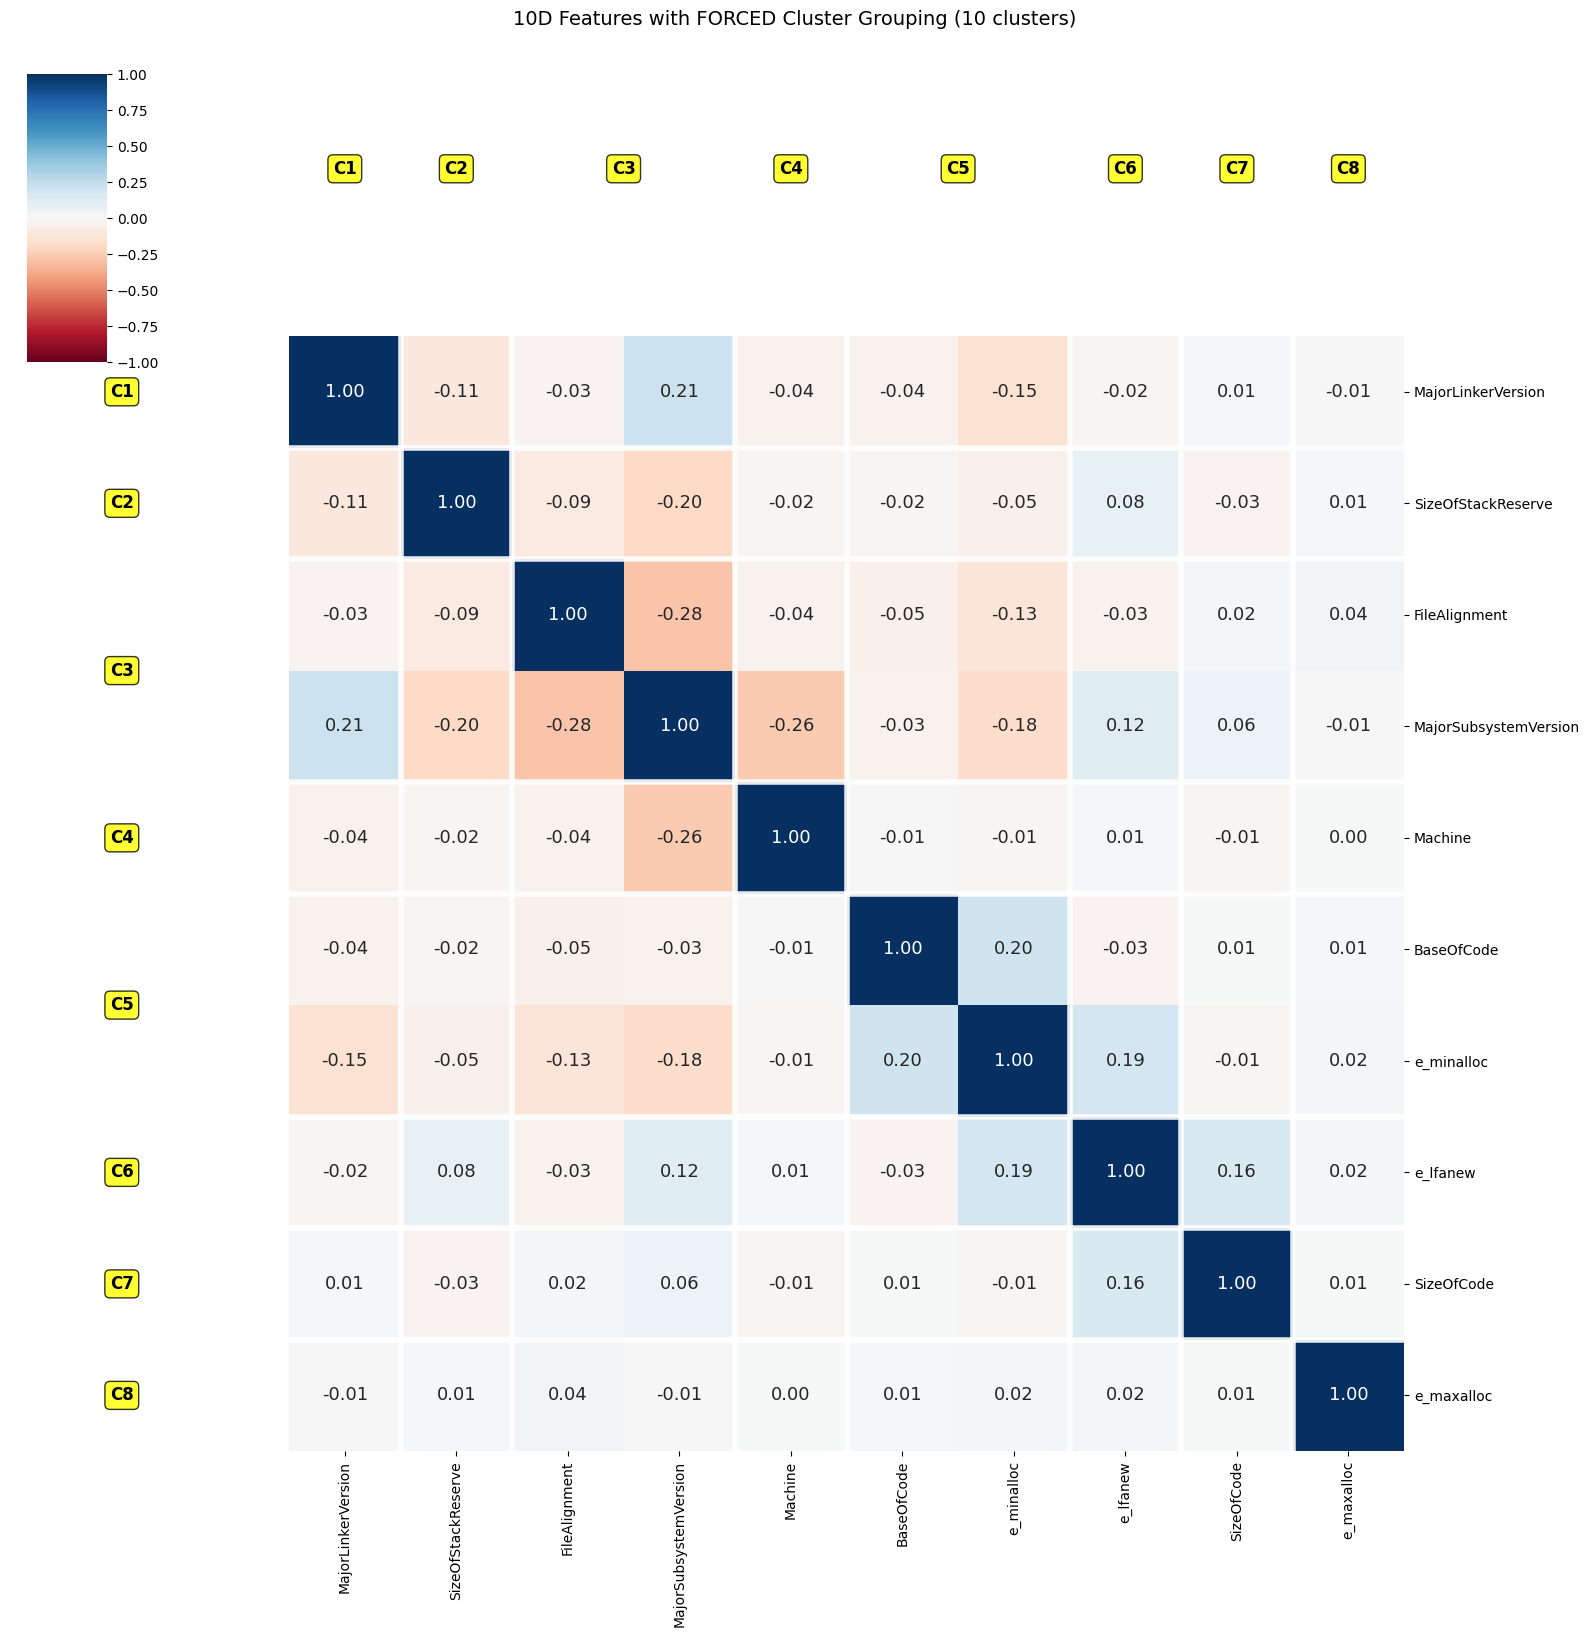


FORCED Cluster Summary for 10:
Features are GUARANTEED to be grouped by cluster (no dendrogram reordering)
Ordered features: ['MajorLinkerVersion', 'SizeOfStackReserve', 'FileAlignment', 'MajorSubsystemVersion', 'Machine', 'BaseOfCode', 'e_minalloc', 'e_lfanew', 'SizeOfCode', 'e_maxalloc']

Cluster groups (in matrix order):
Cluster 1 (1 features): ['MajorLinkerVersion']
Cluster 2 (1 features): ['SizeOfStackReserve']
Cluster 3 (2 features): ['FileAlignment', 'MajorSubsystemVersion']
Cluster 4 (1 features): ['Machine']
Cluster 5 (2 features): ['BaseOfCode', 'e_minalloc']
Cluster 6 (1 features): ['e_lfanew']
Cluster 7 (1 features): ['SizeOfCode']
Cluster 8 (1 features): ['e_maxalloc']


In [23]:
processor = MinimalDataProcessor(
    dataset_path=dataset_path,
    target_col='class'
)
feature_2to10 = processor.run_all()
feature_2to10 = feature_2to10[:9]
# Get specific features
# features_5d = processor.get_features(5)
# subset_data = processor.get_subset(5, include_target=True)

Generated feature_2to10 with 18 entries
  2D: 2 features - ['e_cblp', 'SizeOfCode']
  3D: 3 features - ['e_cblp', 'MajorSubsystemVersion', 'SizeOfCode']
  4D: 4 features - ['e_cblp', 'MajorSubsystemVersion', 'Machine', 'SizeOfCode']
  5D: 5 features - ['e_minalloc', 'e_maxalloc', 'MajorSubsystemVersion', 'Machine', 'SizeOfCode']
  6D: 6 features - ['e_minalloc', 'e_maxalloc', 'SizeOfStackReserve', 'Machine', 'SizeOfCode', 'MajorSubsystemVersion']
  7D: 7 features - ['e_minalloc', 'e_maxalloc', 'MinorLinkerVersion', 'Machine', 'SizeOfCode', 'MajorSubsystemVersion', 'SizeOfStackReserve']
  8D: 8 features - ['e_minalloc', 'e_maxalloc', 'SectionAlignment', 'Machine', 'MinorLinkerVersion', 'SizeOfCode', 'MajorSubsystemVersion', 'SizeOfStackReserve']
  9D: 9 features - ['e_minalloc', 'e_maxalloc', 'e_lfanew', 'Machine', 'MinorLinkerVersion', 'SizeOfCode', 'FileAlignment', 'MajorSubsystemVersion', 'SizeOfStackReserve']
  10D: 10 features - ['e_minalloc', 'e_maxalloc', 'e_lfanew', 'Machine', '

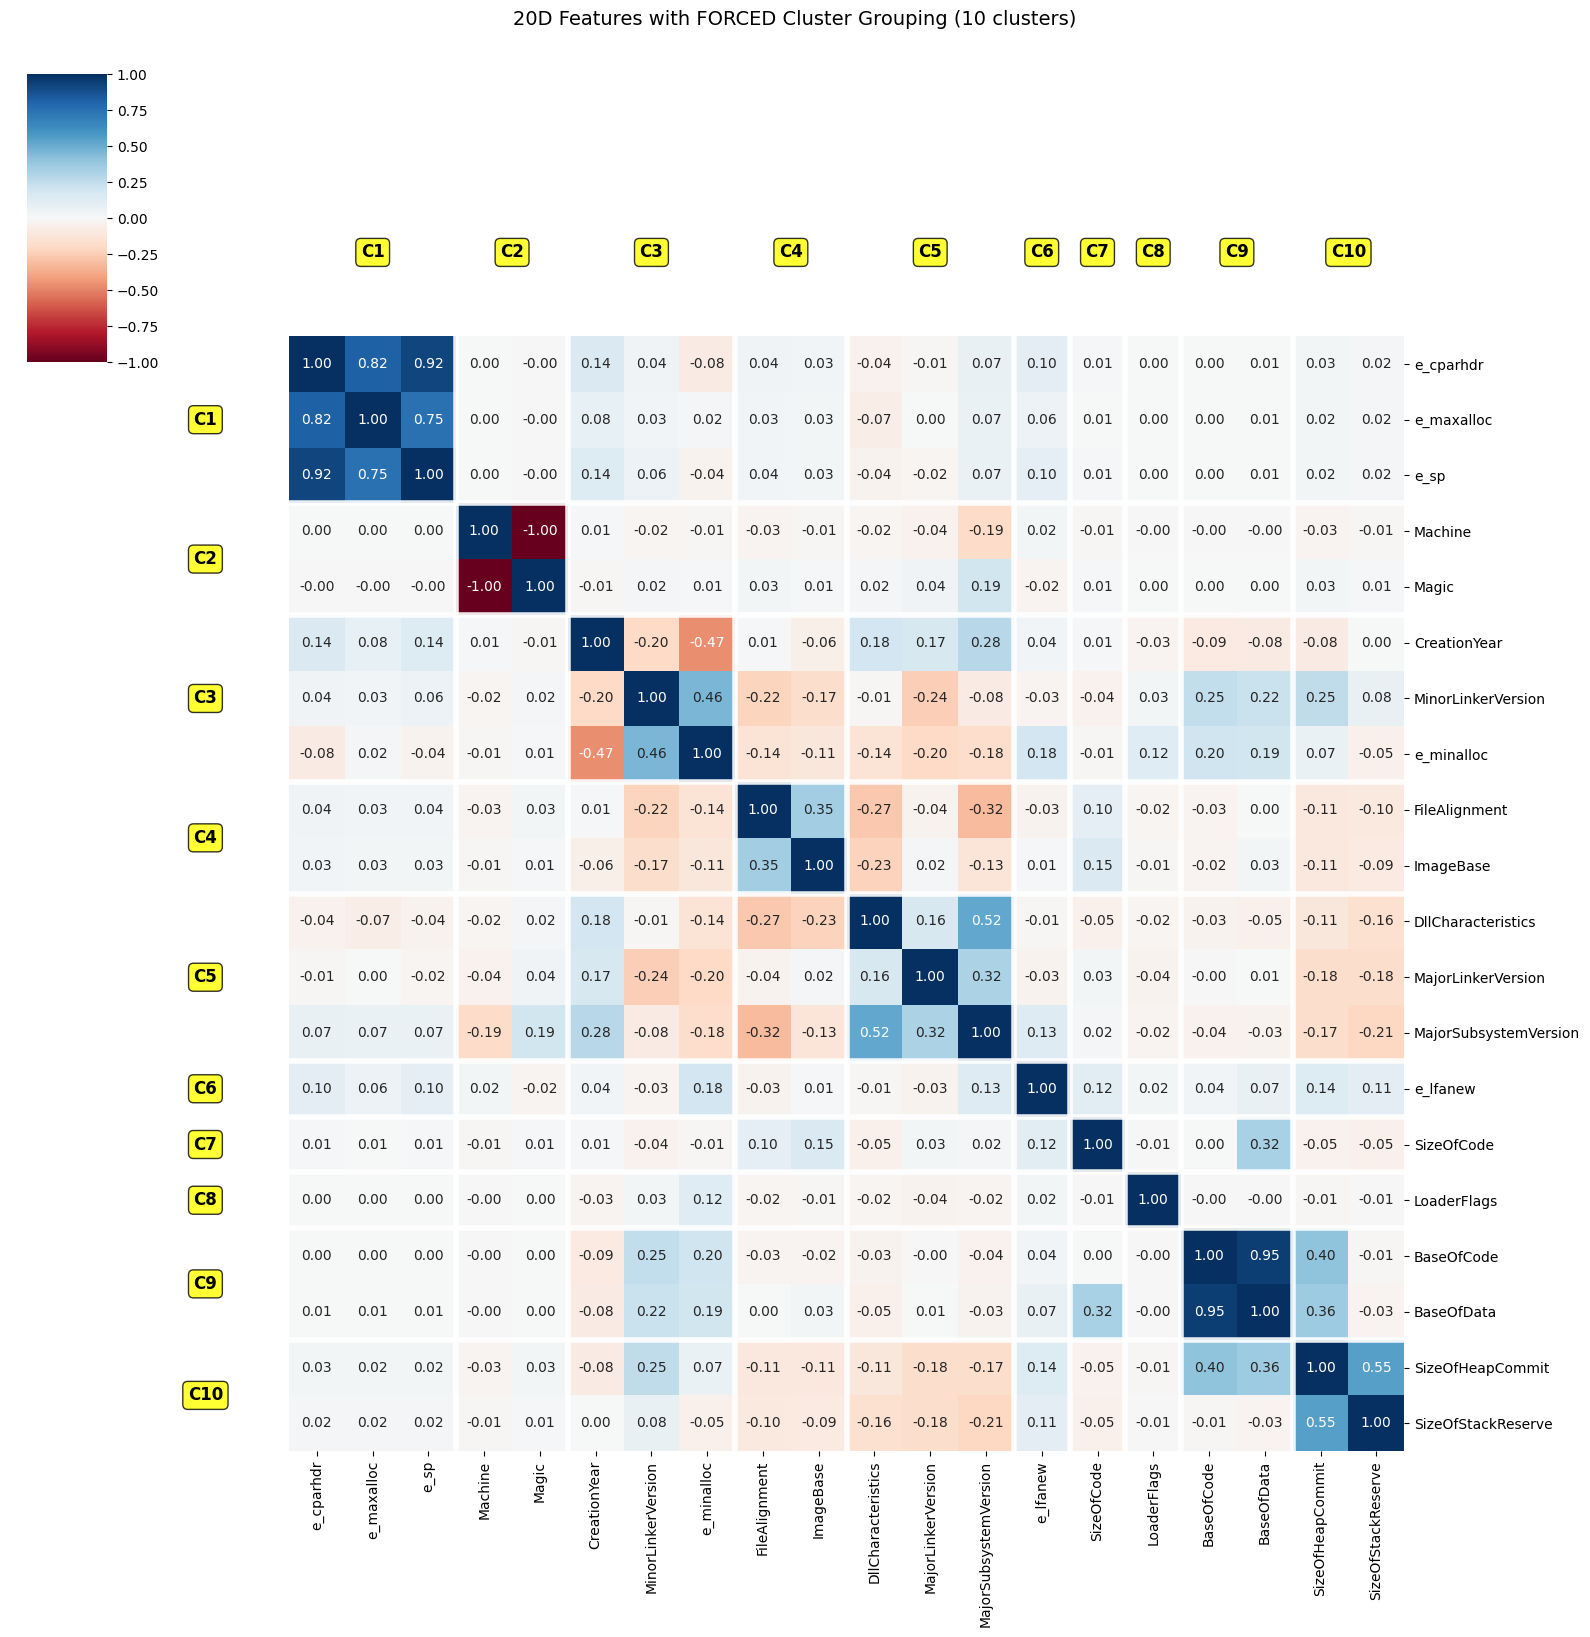


FORCED Cluster Summary for 20:
Features are GUARANTEED to be grouped by cluster (no dendrogram reordering)
Ordered features: ['e_cparhdr', 'e_maxalloc', 'e_sp', 'Machine', 'Magic', 'CreationYear', 'MinorLinkerVersion', 'e_minalloc', 'FileAlignment', 'ImageBase', 'DllCharacteristics', 'MajorLinkerVersion', 'MajorSubsystemVersion', 'e_lfanew', 'SizeOfCode', 'LoaderFlags', 'BaseOfCode', 'BaseOfData', 'SizeOfHeapCommit', 'SizeOfStackReserve']

Cluster groups (in matrix order):
Cluster 1 (3 features): ['e_cparhdr', 'e_maxalloc', 'e_sp']
Cluster 2 (2 features): ['Machine', 'Magic']
Cluster 3 (3 features): ['CreationYear', 'MinorLinkerVersion', 'e_minalloc']
Cluster 4 (2 features): ['FileAlignment', 'ImageBase']
Cluster 5 (3 features): ['DllCharacteristics', 'MajorLinkerVersion', 'MajorSubsystemVersion']
Cluster 6 (1 features): ['e_lfanew']
Cluster 7 (1 features): ['SizeOfCode']
Cluster 8 (1 features): ['LoaderFlags']
Cluster 9 (2 features): ['BaseOfCode', 'BaseOfData']
Cluster 10 (2 feature

[['e_cblp', 'SizeOfCode'],
 ['e_cblp', 'MajorSubsystemVersion', 'SizeOfCode'],
 ['e_cblp', 'MajorSubsystemVersion', 'Machine', 'SizeOfCode'],
 ['e_minalloc',
  'e_maxalloc',
  'MajorSubsystemVersion',
  'Machine',
  'SizeOfCode'],
 ['e_minalloc',
  'e_maxalloc',
  'SizeOfStackReserve',
  'Machine',
  'SizeOfCode',
  'MajorSubsystemVersion'],
 ['e_minalloc',
  'e_maxalloc',
  'MinorLinkerVersion',
  'Machine',
  'SizeOfCode',
  'MajorSubsystemVersion',
  'SizeOfStackReserve'],
 ['e_minalloc',
  'e_maxalloc',
  'SectionAlignment',
  'Machine',
  'MinorLinkerVersion',
  'SizeOfCode',
  'MajorSubsystemVersion',
  'SizeOfStackReserve'],
 ['e_minalloc',
  'e_maxalloc',
  'e_lfanew',
  'Machine',
  'MinorLinkerVersion',
  'SizeOfCode',
  'FileAlignment',
  'MajorSubsystemVersion',
  'SizeOfStackReserve'],
 ['e_minalloc',
  'e_maxalloc',
  'e_lfanew',
  'Machine',
  'BaseOfCode',
  'MajorLinkerVersion',
  'SizeOfCode',
  'FileAlignment',
  'MajorSubsystemVersion',
  'SizeOfStackReserve'],
 ['e

In [24]:
processor.run_all(plotd=20) 

Generated feature_2to10 with 27 entries
  2D: 2 features - ['e_cblp', 'SizeOfCode']
  3D: 3 features - ['e_cblp', 'MajorSubsystemVersion', 'SizeOfCode']
  4D: 4 features - ['e_cblp', 'MajorSubsystemVersion', 'Machine', 'SizeOfCode']
  5D: 5 features - ['e_minalloc', 'e_maxalloc', 'MajorSubsystemVersion', 'Machine', 'SizeOfCode']
  6D: 6 features - ['e_minalloc', 'e_maxalloc', 'SizeOfStackReserve', 'Machine', 'SizeOfCode', 'MajorSubsystemVersion']
  7D: 7 features - ['e_minalloc', 'e_maxalloc', 'MinorLinkerVersion', 'Machine', 'SizeOfCode', 'MajorSubsystemVersion', 'SizeOfStackReserve']
  8D: 8 features - ['e_minalloc', 'e_maxalloc', 'SectionAlignment', 'Machine', 'MinorLinkerVersion', 'SizeOfCode', 'MajorSubsystemVersion', 'SizeOfStackReserve']
  9D: 9 features - ['e_minalloc', 'e_maxalloc', 'e_lfanew', 'Machine', 'MinorLinkerVersion', 'SizeOfCode', 'FileAlignment', 'MajorSubsystemVersion', 'SizeOfStackReserve']
  10D: 10 features - ['e_minalloc', 'e_maxalloc', 'e_lfanew', 'Machine', '

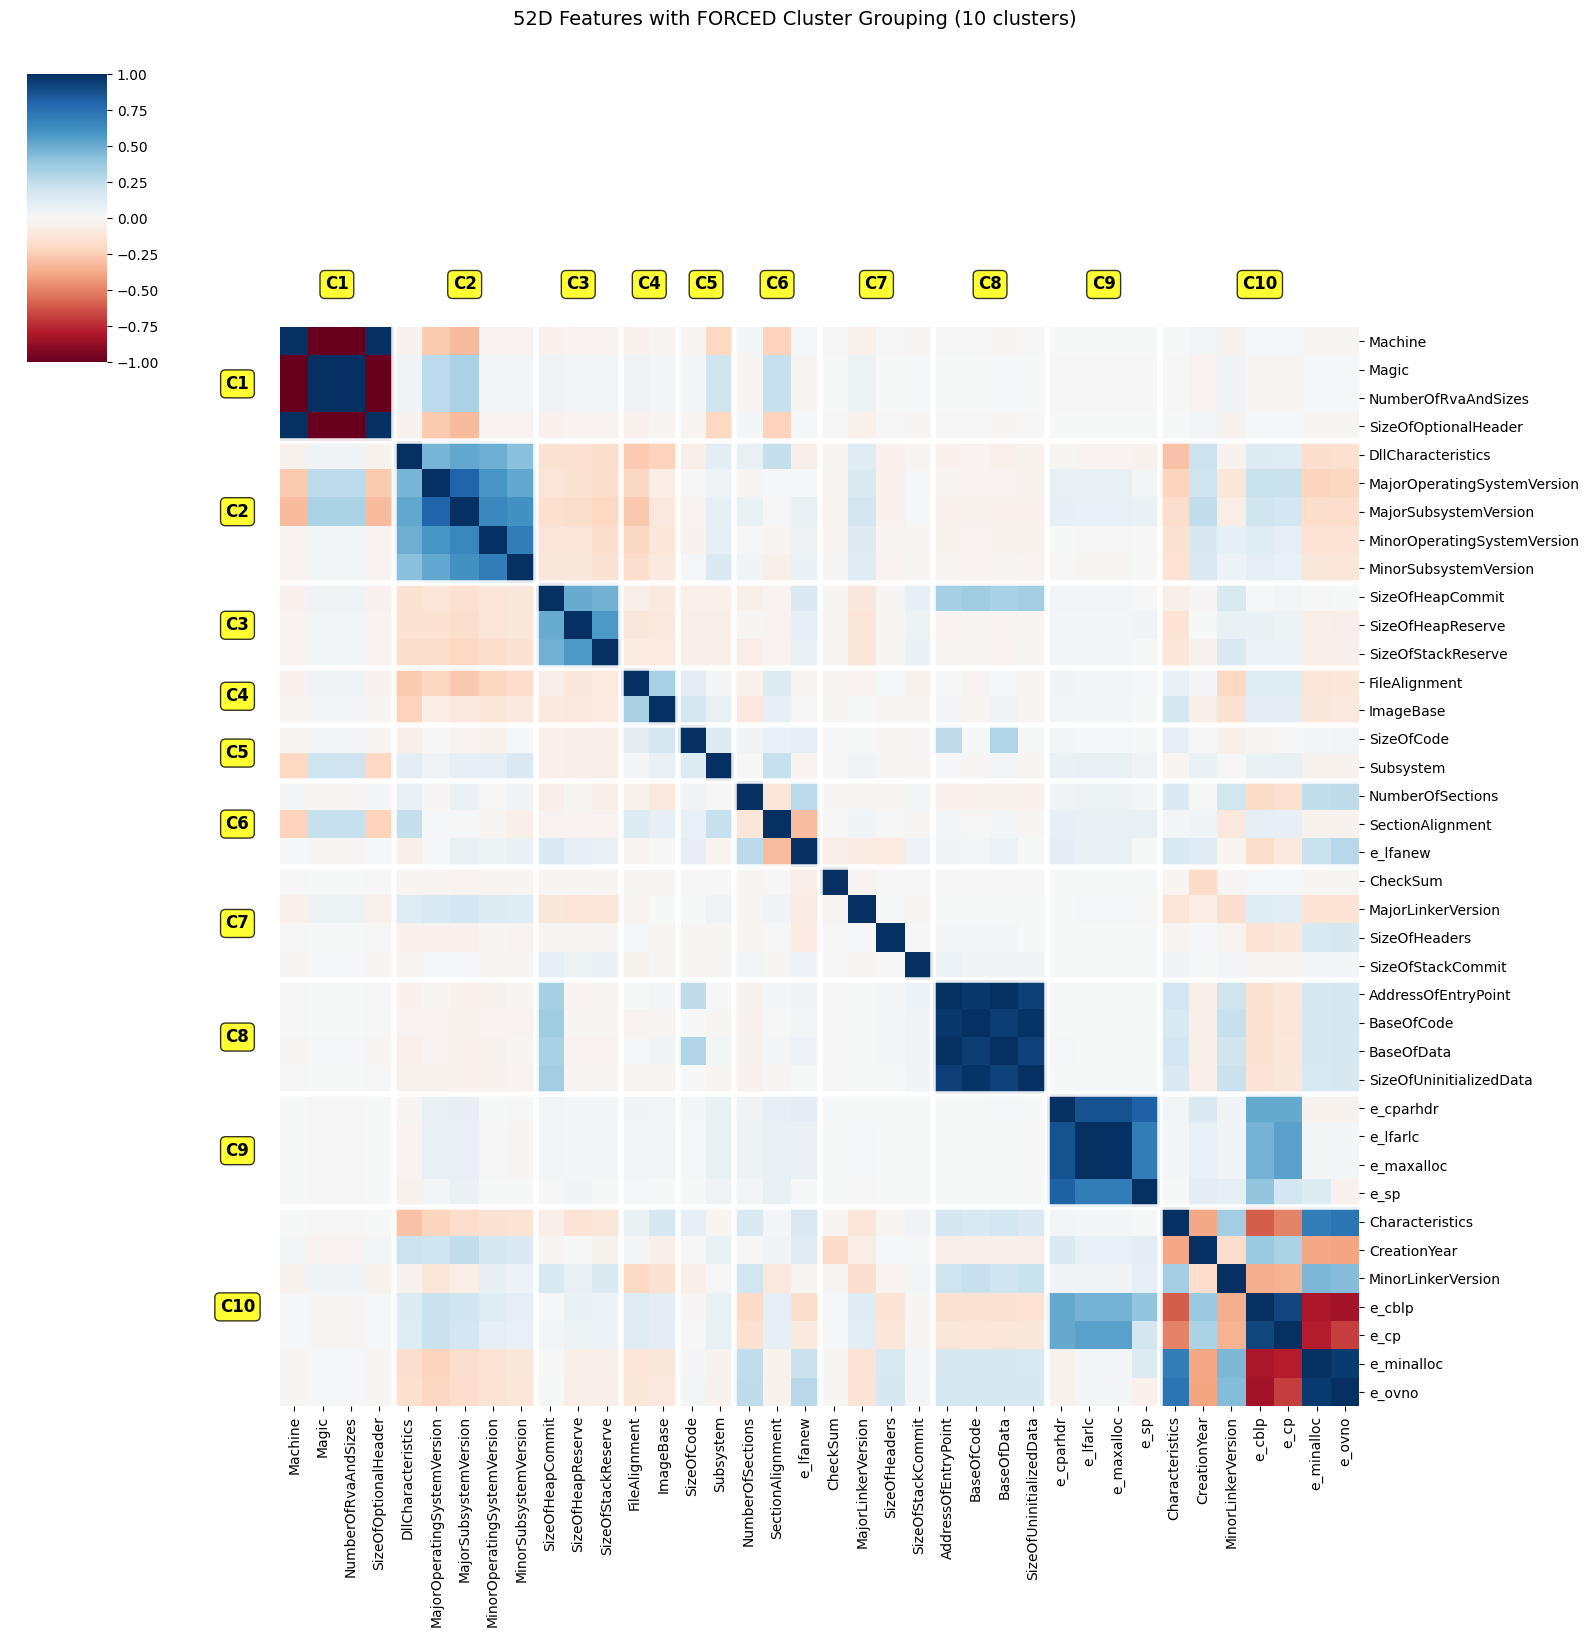


FORCED Cluster Summary for 52:
Features are GUARANTEED to be grouped by cluster (no dendrogram reordering)
Ordered features: ['Machine', 'Magic', 'NumberOfRvaAndSizes', 'SizeOfOptionalHeader', 'DllCharacteristics', 'MajorOperatingSystemVersion', 'MajorSubsystemVersion', 'MinorOperatingSystemVersion', 'MinorSubsystemVersion', 'SizeOfHeapCommit', 'SizeOfHeapReserve', 'SizeOfStackReserve', 'FileAlignment', 'ImageBase', 'SizeOfCode', 'Subsystem', 'NumberOfSections', 'SectionAlignment', 'e_lfanew', 'CheckSum', 'MajorLinkerVersion', 'SizeOfHeaders', 'SizeOfStackCommit', 'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'SizeOfUninitializedData', 'e_cparhdr', 'e_lfarlc', 'e_maxalloc', 'e_sp', 'Characteristics', 'CreationYear', 'MinorLinkerVersion', 'e_cblp', 'e_cp', 'e_minalloc', 'e_ovno']

Cluster groups (in matrix order):
Cluster 1 (4 features): ['Machine', 'Magic', 'NumberOfRvaAndSizes', 'SizeOfOptionalHeader']
Cluster 2 (5 features): ['DllCharacteristics', 'MajorOperatingSystemVersion',

[['e_cblp', 'SizeOfCode'],
 ['e_cblp', 'MajorSubsystemVersion', 'SizeOfCode'],
 ['e_cblp', 'MajorSubsystemVersion', 'Machine', 'SizeOfCode'],
 ['e_minalloc',
  'e_maxalloc',
  'MajorSubsystemVersion',
  'Machine',
  'SizeOfCode'],
 ['e_minalloc',
  'e_maxalloc',
  'SizeOfStackReserve',
  'Machine',
  'SizeOfCode',
  'MajorSubsystemVersion'],
 ['e_minalloc',
  'e_maxalloc',
  'MinorLinkerVersion',
  'Machine',
  'SizeOfCode',
  'MajorSubsystemVersion',
  'SizeOfStackReserve'],
 ['e_minalloc',
  'e_maxalloc',
  'SectionAlignment',
  'Machine',
  'MinorLinkerVersion',
  'SizeOfCode',
  'MajorSubsystemVersion',
  'SizeOfStackReserve'],
 ['e_minalloc',
  'e_maxalloc',
  'e_lfanew',
  'Machine',
  'MinorLinkerVersion',
  'SizeOfCode',
  'FileAlignment',
  'MajorSubsystemVersion',
  'SizeOfStackReserve'],
 ['e_minalloc',
  'e_maxalloc',
  'e_lfanew',
  'Machine',
  'BaseOfCode',
  'MajorLinkerVersion',
  'SizeOfCode',
  'FileAlignment',
  'MajorSubsystemVersion',
  'SizeOfStackReserve'],
 ['e

In [25]:
# force everione in the cluster be together in the correlation matrix and allow us to be able to call processor.run_all(plotd="all") to get all atributs of df in this hierarchical cluater correlation
processor.run_all(plotd=52) 

# Model Training

In [47]:
import pandas as pd
import numpy as np
import time
import os
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.pairwise import rbf_kernel
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import QSVC

class ModelEvaluator:
    """
    Enhanced model evaluator that supports:
    - Classical/Quantum SVM (SVC/QSVC)
    - Classical/Quantum Clustering (CC/QC)
    - Classical/Quantum PCA (CPCA/QPCA/QPCA+RBF)
    """
    
    def __init__(self, quantum_available=False, csv_filename=None, model_type='svc'):
        """
        Initialize the evaluator with resume capability
        
        Parameters:
        -----------
        quantum_available : bool
            Whether quantum computing resources are available
        csv_filename : str
            Custom filename for CSV output. If None, uses default naming based on model_type
        model_type : str
            Type of model: 'svc', 'cc' (clustering), 'cpca' (classical pca), 
            'qsvc', 'qc' (quantum clustering), 'qpca' (quantum pca)
        """
        self.quantum_available = quantum_available
        self.model_type = model_type.lower()
        
        # Determine CSV filename based on model type
        if csv_filename is None:
            csv_mapping = {
                'svc': 'results/df_svc.csv',
                'qsvc': 'results/df_qsvc.csv',
                'cc': 'results/df_cc.csv',
                'qc': 'results/df_qc.csv',
                'qcc': 'results/df_qcc.csv',
                'cpca': 'results/df_cpca.csv',
                'qpca': 'results/df_qpca.csv',
                'qpca_rbf': 'results/df_qpca_rbf.csv'
            }
            self.csv_filename = csv_mapping.get(self.model_type, f"results/df_{self.model_type}.csv")
        else:
            self.csv_filename = csv_filename
        
        self.results_df = pd.DataFrame({
            'Model': [], 'Fold': [], 'TP': [], 'TN': [], 'FP': [], 'FN': [], 'Accuracy': [],
            'Precision': [], 'Sensitivity': [], 'Specificity': [], 'F1 Score': [],
            'Elapsed Time (s)': [], 'Usage (s)': [], 'Estimated Usage (s)': [],
            'Num Qubits': [], 'Median T1': [], 'Median T2': [], 'Median Read Out Error': []
        })
        
        # Load existing results
        self._load_existing_results()
    
    def _load_existing_results(self):
        """Load existing CSV results"""
        try:
            if os.path.exists(self.csv_filename):
                self.existing_results = pd.read_csv(self.csv_filename)
                
                # Clean up the dataframe - keep only the expected columns
                expected_cols = self.results_df.columns.tolist()
                
                # Filter to only keep columns that exist in both
                valid_cols = [col for col in expected_cols if col in self.existing_results.columns]
                self.existing_results = self.existing_results[valid_cols]
                
                # Ensure Model column is string type
                if 'Model' in self.existing_results.columns:
                    self.existing_results['Model'] = self.existing_results['Model'].astype(str)
                
                # Ensure Fold column is numeric and convert to int where appropriate
                if 'Fold' in self.existing_results.columns:
                    self.existing_results['Fold'] = pd.to_numeric(self.existing_results['Fold'], errors='coerce')
                
                print(f"📂 Loaded {len(self.existing_results)} existing results from {self.csv_filename}")
            else:
                self.existing_results = pd.DataFrame()
                # Create directory if it doesn't exist
                os.makedirs(os.path.dirname(self.csv_filename), exist_ok=True)
                # Create empty CSV
                pd.DataFrame(columns=self.results_df.columns).to_csv(self.csv_filename, index=False)
                print(f"📝 Created new file: {self.csv_filename}")
        except Exception as e:
            print(f"❌ Error loading CSV: {e}")
            self.existing_results = pd.DataFrame()
    
    def _should_skip_fold(self, n_clusters, fold_idx, model_type):
        """Check if fold should be skipped based on existing results"""
        if self.existing_results.empty:
            return False
        
        try:
            # Ensure Model column is string and not NaN
            model_col = self.existing_results['Model'].fillna('').astype(str)
            
            # Find matching models
            model_pattern = f"{model_type}.*{n_clusters}D"
            matching_models = self.existing_results[
                model_col.str.contains(model_pattern, regex=True, case=False, na=False)
            ]
            
            if matching_models.empty:
                return False
            
            # Check if this exact fold exists
            fold_col = pd.to_numeric(matching_models['Fold'], errors='coerce')
            exact_match = matching_models[fold_col == fold_idx]
            if not exact_match.empty:
                print(f"  ⏭️  Skipping {model_type}_{n_clusters}D fold {fold_idx} - already exists")
                return True
            
            # Check if we have higher folds
            max_fold = fold_col.max()
            if pd.notna(max_fold) and max_fold >= fold_idx:
                print(f"  ⏭️  Skipping {model_type}_{n_clusters}D fold {fold_idx} - higher fold {int(max_fold)} exists")
                return True
            
            return False
            
        except Exception as e:
            print(f"❌ Error checking fold skip: {e}")
            return False
    
    def _save_result(self, result_dict):
        """Save single result to CSV immediately"""
        try:
            # Only save the columns that match our expected structure
            expected_cols = self.results_df.columns.tolist()
            clean_result = {col: result_dict.get(col, 0) for col in expected_cols}
            
            # Remove any non-serializable objects
            if 'model_object' in clean_result:
                del clean_result['model_object']
            if 'fold_score' in clean_result:
                del clean_result['fold_score']
                
            df_row = pd.DataFrame([clean_result])
            df_row.to_csv(self.csv_filename, mode='a', header=False, index=False)
            print(f"✓ Saved to {self.csv_filename}")
        except Exception as e:
            print(f"❌ Save error: {e}")
    
    def calculate_metrics(self, y_true, y_pred):
        """Calculate comprehensive classification metrics"""
        cm = confusion_matrix(y_true, y_pred)
        tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, len(y_true))
        
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
        sensitivity = recall_score(y_true, y_pred, average='weighted', zero_division=0)  # Same as recall
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
        
        return {
            'TP': int(tp),
            'TN': int(tn),
            'FP': int(fp),
            'FN': int(fn),
            'Accuracy': accuracy,
            'Precision': precision,
            'Sensitivity': sensitivity,
            'Specificity': specificity,
            'F1 Score': f1
        }
    
    def get_quantum_metrics(self):
        """Get quantum-specific metrics (mock implementation when not available)"""
        if self.quantum_available:
            # Replace with actual quantum backend queries
            return {
                'Usage (s)': np.random.uniform(0.5, 2.0),
                'Estimated Usage (s)': np.random.uniform(1.0, 3.0),
                'Num Qubits': np.random.randint(4, 12),
                'Median T1': np.random.uniform(50, 100),
                'Median T2': np.random.uniform(20, 80),
                'Median Read Out Error': np.random.uniform(0.01, 0.05)
            }
        else:
            return {
                'Usage (s)': 0,
                'Estimated Usage (s)': 0,
                'Num Qubits': 0,
                'Median T1': 0,
                'Median T2': 0,
                'Median Read Out Error': 0
            }
    
    # def _cluster_and_match(self, X, y_true, n_clusters, quantum=False):
    #     """Perform clustering and align labels with ground truth using Hungarian matching"""
    #     if quantum:
    #         # Quantum kernel matrix
    #         feature_map = ZZFeatureMap(feature_dimension=X.shape[1], reps=2)
    #         qkernel = FidelityQuantumKernel(feature_map=feature_map)
    #         kernel_matrix = qkernel.evaluate(X, X)
    #         clustering = SpectralClustering(
    #             n_clusters=n_clusters, affinity='precomputed', random_state=42
    #         ).fit(kernel_matrix)
    #     else:
    #         # Classical RBF kernel matrix
    #         kernel_matrix = rbf_kernel(X)
    #         clustering = SpectralClustering(
    #             n_clusters=n_clusters, affinity='precomputed', random_state=42
    #         ).fit(kernel_matrix)

    #     y_pred = clustering.labels_

    #     # Align cluster labels with ground-truth using Hungarian assignment
    #     cm = confusion_matrix(y_true, y_pred)
    #     row_ind, col_ind = linear_sum_assignment(-cm)  # maximize match
    #     mapping = {col: row for row, col in zip(row_ind, col_ind)}
    #     y_aligned = np.array([mapping.get(label, -1) for label in y_pred])
    #     return y_aligned
    def _cluster_and_match(self, X, y_true, n_clusters, quantum=False, quantum_circuit=False):
        """
        Perform clustering and align labels with ground truth using Hungarian matching
        
        Parameters:
        -----------
        X : array-like
            Input features
        y_true : array-like
            True labels
        n_clusters : int
            Number of clusters
        quantum : bool
            Use quantum kernel (original method)
        quantum_circuit : bool
            Use quantum clustering circuit method (simulator-based)
        """
        
        if quantum_circuit:
            print("HEREEE")
            # Quantum clustering circuit method (simulator-based)
            # Normalize the features into [0, π] for angle encoding
            scaler = MinMaxScaler(feature_range=(0, np.pi))
            X_scaled = scaler.fit_transform(X)
            
            # Clustering parameters
            n_epochs = 2  # Reduced for efficiency in evaluation
            n_samples = X_scaled.shape[0]
            num_features = X_scaled.shape[1]
            
            # Use quantum kernel similar to QSVC approach
            feature_map = ZZFeatureMap(feature_dimension=num_features, reps=2)
            fidelity_quantum_kernel = FidelityQuantumKernel(feature_map=feature_map)
            
            # Initialize random cluster centers
            cluster_centers = X_scaled[np.random.choice(n_samples, n_clusters, replace=False)]
            
            # Main training loop (Quantum Kernel k-means style)
            for epoch in range(n_epochs):
                y_pred = np.zeros(n_samples)
                
                # Assign points to nearest cluster using quantum kernel similarity
                for i, x in enumerate(X_scaled):
                    similarities = []
                    for c in cluster_centers:
                        # Evaluate quantum kernel between point and cluster center
                        sim_matrix = fidelity_quantum_kernel.evaluate(
                            x.reshape(1, -1), 
                            c.reshape(1, -1)
                        )
                        similarities.append(sim_matrix[0, 0])
                    y_pred[i] = np.argmax(similarities)
                
                # Update cluster centers (mean of assigned samples)
                for j in range(n_clusters):
                    points_in_cluster = X_scaled[y_pred == j]
                    if len(points_in_cluster) > 0:
                        cluster_centers[j] = np.mean(points_in_cluster, axis=0)
            
        elif quantum:
            # Original quantum kernel matrix method
            feature_map = ZZFeatureMap(feature_dimension=X.shape[1], reps=2)
            qkernel = FidelityQuantumKernel(feature_map=feature_map)
            kernel_matrix = qkernel.evaluate(X, X)
            clustering = SpectralClustering(
                n_clusters=n_clusters, affinity='precomputed', random_state=42
            ).fit(kernel_matrix)
            y_pred = clustering.labels_
            
        else:
            # Classical RBF kernel matrix
            kernel_matrix = rbf_kernel(X)
            clustering = SpectralClustering(
                n_clusters=n_clusters, affinity='precomputed', random_state=42
            ).fit(kernel_matrix)
            y_pred = clustering.labels_

        # Align cluster labels with ground-truth using Hungarian assignment
        cm = confusion_matrix(y_true, y_pred)
        row_ind, col_ind = linear_sum_assignment(-cm)  # maximize match
        mapping = {col: row for row, col in zip(row_ind, col_ind)}
        y_aligned = np.array([mapping.get(label, -1) for label in y_pred])
        return y_aligned
    
    def _apply_pca_and_classify(self, X_train, X_test, y_train, y_test, method='cpca'):
        """
        Apply PCA transformation and classify using Logistic Regression
        
        Parameters:
        -----------
        X_train, X_test : array-like
            Training and test features
        y_train, y_test : array-like
            Training and test labels
        method : str
            PCA method: 'cpca' (classical), 'qpca' (quantum), 'qpca_rbf' (quantum+rbf)
        """
        n_components = min(X_train.shape[1] - 1, X_train.shape[0] - 1, 10)  # Reasonable number of components
        
        if method == 'cpca':
            # Classical PCA with RBF kernel preprocessing
            kernel_train = rbf_kernel(X_train)
            kernel_test = rbf_kernel(X_test, X_train)
            
            pca = PCA(n_components=n_components, random_state=42)
            X_train_pca = pca.fit_transform(kernel_train)
            X_test_pca = pca.transform(kernel_test)
            
        elif method == 'qpca':
            # Quantum PCA - using quantum kernel
            feature_map = ZZFeatureMap(feature_dimension=X_train.shape[1], reps=2)
            qkernel = FidelityQuantumKernel(feature_map=feature_map)
            
            # Compute quantum kernel matrices
            kernel_train = qkernel.evaluate(X_train, X_train)
            kernel_test = qkernel.evaluate(X_test, X_train)
            
            pca = PCA(n_components=n_components, random_state=42)
            X_train_pca = pca.fit_transform(kernel_train)
            X_test_pca = pca.transform(kernel_test)
            
        elif method == 'qpca_rbf':
            # Quantum PCA with RBF kernel preprocessing + Quantum kernel
            # First apply RBF kernel
            rbf_train = rbf_kernel(X_train)
            rbf_test = rbf_kernel(X_test, X_train)
            
            # Then apply quantum kernel on RBF features (using a subset for computational efficiency)
            n_features = min(rbf_train.shape[1], 8)  # Limit features for quantum processing
            rbf_train_subset = rbf_train[:, :n_features]
            rbf_test_subset = rbf_test[:, :n_features]
            
            feature_map = ZZFeatureMap(feature_dimension=n_features, reps=2)
            qkernel = FidelityQuantumKernel(feature_map=feature_map)
            
            kernel_train = qkernel.evaluate(rbf_train_subset, rbf_train_subset)
            kernel_test = qkernel.evaluate(rbf_test_subset, rbf_train_subset)
            
            pca = PCA(n_components=n_components, random_state=42)
            X_train_pca = pca.fit_transform(kernel_train)
            X_test_pca = pca.transform(kernel_test)
        
        # Classify using Logistic Regression
        classifier = LogisticRegression(random_state=42, max_iter=1000)
        classifier.fit(X_train_pca, y_train)
        y_pred = classifier.predict(X_test_pca)
        
        return y_pred

    def evaluate_single_fold(self, X_train, X_test, y_train, y_test, model_name, fold_idx, service=None, backend_name=None):
        """Enhanced to support classification, clustering, and PCA methods"""
        start_time = time.time()
        model_lower = model_name.lower()

        if "qcc" in model_lower:         # Quantum clustering circuit
            y_pred = self._cluster_and_match(
                X_test, y_test, 
                n_clusters=len(np.unique(y_test)), 
                quantum=False, 
                quantum_circuit=True
            )
        elif "qc" in model_lower:   # Quantum clustering
            y_pred = self._cluster_and_match(X_test, y_test, n_clusters=len(np.unique(y_test)), quantum=True)
        elif "cc" in model_lower: # Classical clustering
            y_pred = self._cluster_and_match(X_test, y_test, n_clusters=len(np.unique(y_test)), quantum=False)
        elif "qpca_rbf" in model_lower:  # Quantum PCA + RBF
            y_pred = self._apply_pca_and_classify(X_train, X_test, y_train, y_test, method='qpca_rbf')
        elif "qpca" in model_lower:      # Quantum PCA
            y_pred = self._apply_pca_and_classify(X_train, X_test, y_train, y_test, method='qpca')
        elif "cpca" in model_lower:      # Classical PCA
            y_pred = self._apply_pca_and_classify(X_train, X_test, y_train, y_test, method='cpca')
        elif "qsvc" in model_lower:      # Quantum classifier
            feature_map = ZZFeatureMap(feature_dimension=X_train.shape[1], reps=2)
            quantum_kernel = FidelityQuantumKernel(feature_map=feature_map)
            model = QSVC(quantum_kernel=quantum_kernel)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        else:                            # Classical classifier
            model = SVC(kernel='rbf', random_state=42)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        elapsed_time = time.time() - start_time
        metrics = self.calculate_metrics(y_test, y_pred)
        
        # Determine if quantum metrics should be included
        quantum_methods = ["qc", "qcc", "qsvc", "qpca", "qaoa"]  # Add "qcc"
        is_quantum = any(qm in model_lower for qm in quantum_methods)
        quantum_metrics = self.get_quantum_metrics() if is_quantum else {
            'Usage (s)': 0, 'Estimated Usage (s)': 0, 'Num Qubits': 0,
            'Median T1': 0, 'Median T2': 0, 'Median Read Out Error': 0
        }

        fold_result = {
            'Model': model_name, 'Fold': fold_idx, 'Elapsed Time (s)': elapsed_time,
            **metrics, **quantum_metrics, 'fold_score': metrics['Accuracy']
        }
        self._save_result(fold_result)
        return fold_result

    def evaluate_feature_set(self, X, y, n_clusters, model_name='SVC'):
        """Modified to handle different model types and correct CSV saving"""
        print(f"\n--- Evaluating {n_clusters}D features: {list(X.columns)} ---")
        
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        kf = KFold(n_splits=10, shuffle=True, random_state=42)
        
        fold_results = []
        print("Fold Results:")
        
        for fold_idx, (train_idx, test_idx) in enumerate(kf.split(X_scaled)):
            current_fold = fold_idx + 1
            X_train_fold, X_test_fold = X_scaled[train_idx], X_scaled[test_idx]
            y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]
            
            # Evaluate fold (will skip if already exists)
            fold_result = self.evaluate_single_fold(
                X_train_fold, X_test_fold, y_train_fold, y_test_fold, 
                f"{model_name}_{n_clusters}D", current_fold
            )
            
            if fold_result:  # Only add if not skipped
                fold_results.append(fold_result)
                print(f"  Fold {current_fold:2d}: {fold_result['fold_score']:.4f}")
        
        # Load any existing results for this dimension to complete the picture
        if not self.existing_results.empty:
            try:
                model_col = self.existing_results['Model'].fillna('').astype(str)
                model_pattern = f"{model_name}.*{n_clusters}D"
                existing_folds = self.existing_results[
                    model_col.str.contains(model_pattern, regex=True, case=False, na=False)
                ]
                
                for _, row in existing_folds.iterrows():
                    fold_num = pd.to_numeric(row['Fold'], errors='coerce')
                    if pd.notna(fold_num) and fold_num <= 10:  # Regular folds only
                        existing_result = {
                            'fold_score': row.get('Accuracy', 0), 
                            'Fold': int(fold_num),
                            **row.to_dict(), 
                            'model_object': None
                        }
                        # Add if not already in fold_results
                        if not any(fr.get('Fold') == int(fold_num) for fr in fold_results):
                            fold_results.append(existing_result)
            except Exception as e:
                print(f"❌ Error loading existing folds: {e}")
        
        # Sort by fold number
        fold_results.sort(key=lambda x: x['Fold'])
        
        # Continue with retraining logic if we have enough folds
        if len(fold_results) >= 2:
            best_fold = max(fold_results, key=lambda x: x['fold_score'])
            worst_fold = min(fold_results, key=lambda x: x['fold_score'])
            
            # Convert Fold values to integers
            best_fold_num = int(best_fold['Fold'])
            worst_fold_num = int(worst_fold['Fold'])
            
            print(f"\nBest fold: {best_fold_num} (score: {best_fold['fold_score']:.4f})")
            print(f"Worst fold: {worst_fold_num} (score: {worst_fold['fold_score']:.4f})")
            
            # Check if retrained model exists
            retrain_name = f"{model_name}_{n_clusters}D_retrained"
            try:
                model_col = self.existing_results['Model'].fillna('').astype(str)
                retrain_exists = model_col.str.contains(retrain_name, case=False, na=False).any()
            except:
                retrain_exists = False
            
            if not retrain_exists:
                print(f"🔄 Re-training best model with worst fold data...")
                
                # Get fold indices for retraining (convert to 0-based indexing)
                fold_splits = list(kf.split(X_scaled))
                best_fold_idx = best_fold_num - 1
                worst_fold_idx = worst_fold_num - 1
                
                # Get the training data from best fold
                best_train_idx = fold_splits[best_fold_idx][0]
                X_best_train = X_scaled[best_train_idx]
                y_best_train = y.iloc[best_train_idx]
                
                # Get the test data from worst fold
                worst_test_idx = fold_splits[worst_fold_idx][1]
                X_worst_test = X_scaled[worst_test_idx]
                y_worst_test = y.iloc[worst_test_idx]
                
                # Combine data for retraining
                X_retrain = np.vstack([X_best_train, X_worst_test])
                y_retrain = pd.concat([y_best_train, y_worst_test])
                
                # Test on best fold's test set
                best_test_idx = fold_splits[best_fold_idx][1]
                X_best_test = X_scaled[best_test_idx]
                y_best_test = y.iloc[best_test_idx]
                
                # Retrain and evaluate
                retrain_result = self.evaluate_single_fold(
                    X_retrain, X_best_test, y_retrain, y_best_test,
                    retrain_name, f"retrain_{n_clusters}"
                )
                
                if retrain_result:
                    print(f"Retrained model score: {retrain_result['fold_score']:.4f}")
                else:
                    retrain_result = {'fold_score': best_fold['fold_score']}
                    
            else:
                try:
                    model_col = self.existing_results['Model'].fillna('').astype(str)
                    retrain_row = self.existing_results[
                        model_col.str.contains(retrain_name, case=False, na=False)
                    ].iloc[0]
                    retrain_result = {'fold_score': retrain_row.get('Accuracy', 0)}
                    print(f"✓ Retrained model loaded: {retrain_result['fold_score']:.4f}")
                except Exception as e:
                    print(f"❌ Error loading retrained model: {e}")
                    retrain_result = {'fold_score': best_fold['fold_score']}
        else:
            retrain_result = {'fold_score': max([r['fold_score'] for r in fold_results]) if fold_results else 0}
        
        # Calculate summary
        scores = [r['fold_score'] for r in fold_results]
        avg_score = np.mean(scores) if scores else 0
        std_score = np.std(scores) if scores else 0
        best_score = max(scores) if scores else 0
        worst_score = min(scores) if scores else 0
        
        # Find the corresponding fold numbers (already integers from above)
        best_fold_num = next((r['Fold'] for r in fold_results if r['fold_score'] == best_score), 1)
        worst_fold_num = next((r['Fold'] for r in fold_results if r['fold_score'] == worst_score), 1)
        
        return {
            'n_clusters': n_clusters, 'features': list(X.columns),
            'best_fold_num': int(best_fold_num),  # Ensure integer
            'best_fold_score': best_score,
            'worst_fold_num': int(worst_fold_num),  # Ensure integer
            'worst_fold_score': worst_score,
            'retrained_score': retrain_result['fold_score'],
            'avg_cv_score': avg_score, 'std_cv_score': std_score,
            'improvement': retrain_result['fold_score'] - best_score,
            'fold_scores': scores
        }
    
    def plot_evaluation_results(self, results_df, model_name="Model"):
        """Plot evaluation results with correct titles for different model types."""
        # Map model types to proper display names
        title_mapping = {
            'svc': 'Classical SVM',
            'qsvc': 'Quantum SVM', 
            'cc': 'Classical Clustering',
            'qc': 'Quantum Clustering',
            'qcc': 'Quantum Clustering Circuit',
            'cpca': 'Classical PCA',
            'qpca': 'Quantum PCA',
            'qpca_rbf': 'Quantum PCA + RBF'
        }
        
        # Determine display name from model_name or self.model_type
        display_name = model_name
        for key, value in title_mapping.items():
            if key in model_name.lower() or key == self.model_type:
                display_name = value
                break
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        n_dims = results_df['n_clusters'].values
        
        # Plot 1: Average CV scores with error bars
        avg_scores = results_df['avg_cv_score'].values
        std_scores = results_df['std_cv_score'].values
        axes[0,0].errorbar(n_dims, avg_scores, yerr=std_scores,
                           marker='o', capsize=5, capthick=2)
        axes[0,0].set_xlabel('Number of Dimensions')
        axes[0,0].set_ylabel('Average CV Score')
        axes[0,0].set_title(f'Average CV Scores ({display_name})')
        axes[0,0].grid(True, alpha=0.3)
        
        # Plot 2: Best vs Worst fold scores
        best_scores = results_df['best_fold_score'].values
        worst_scores = results_df['worst_fold_score'].values
        axes[0,1].plot(n_dims, best_scores, 'g-o', label='Best Fold', linewidth=2)
        axes[0,1].plot(n_dims, worst_scores, 'r-o', label='Worst Fold', linewidth=2)
        axes[0,1].set_xlabel('Number of Dimensions')
        axes[0,1].set_ylabel('Score')
        axes[0,1].set_title(f'Best vs Worst Folds ({display_name})')
        axes[0,1].legend()
        axes[0,1].grid(True, alpha=0.3)
        
        # Plot 3: Retrained model scores
        retrain_scores = results_df['retrained_score'].values
        axes[1,0].plot(n_dims, retrain_scores, 'b-o', linewidth=2)
        axes[1,0].set_xlabel('Number of Dimensions')
        axes[1,0].set_ylabel('Retrained Score')
        axes[1,0].set_title(f'Retrained Scores ({display_name})')
        axes[1,0].grid(True, alpha=0.3)
        
        # Plot 4: Improvement from retraining
        improvements = results_df['improvement'].values
        axes[1,1].bar(n_dims, improvements, alpha=0.7,
                      color=['green' if x > 0 else 'red' for x in improvements])
        axes[1,1].axhline(y=0, color='black', linestyle='-', alpha=0.5)
        axes[1,1].set_xlabel('Number of Dimensions')
        axes[1,1].set_ylabel('Score Improvement')
        axes[1,1].set_title(f'Retraining Improvement ({display_name})')
        axes[1,1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    # def main_with_resume(self, feature_2to10, df, y, model_type=None):
    #     """Main function with resume capability"""
    #     if model_type is None:
    #         model_type = self.model_type
            
    #     print("="*80)
    #     print(f"{model_type.upper()} TRAINING WITH AUTO-RESUME")
    #     print(f"📁 CSV: {self.csv_filename}")
    #     print("="*80)
        
    #     all_results = []
        
    #     for i in range(len(feature_2to10)):
    #         n_clusters = i + 2
    #         X_temp = df[feature_2to10[i]]
            
    #         result = self.evaluate_feature_set(X_temp, y, n_clusters, model_type.upper())
    #         all_results.append(result)
        
    #     # Create comprehensive results summary
    #     print("\n" + "="*120)
    #     print("COMPREHENSIVE RESULTS SUMMARY")
    #     print("="*120)
    #     results_df = pd.DataFrame(all_results)
    #     if not results_df.empty:
    #         display_columns = ['n_clusters', 'best_fold_score', 'worst_fold_score',
    #                           'retrained_score', 'avg_cv_score', 'std_cv_score', 'improvement']
    #         print(results_df[display_columns].to_string(index=False))
            
    #         # Plot results
    #         self.plot_evaluation_results(results_df, f"{model_type.upper()} (Resume)")
        
    #     print(f"\n✅ Training complete! Check {self.csv_filename}")
    #     print(f"📊 Total results in CSV: {len(pd.read_csv(self.csv_filename)) if os.path.exists(self.csv_filename) else 0}")
        
    #     return all_results
    def main_with_resume(self, feature_2to10, df, y, model_type=None):
        """Enhanced main function with intelligent dimension-level resume"""
        if model_type is None:
            model_type = self.model_type
            
        print("="*80)
        print(f"{model_type.upper()} TRAINING WITH INTELLIGENT AUTO-RESUME")
        print(f"📁 CSV: {self.csv_filename}")
        print("="*80)
        
        # Find starting dimension by checking completion status
        print(f"\n🔍 Scanning for incomplete dimensions in {model_type.upper()}...")
        start_idx = 0
        
        for i in range(len(feature_2to10)):
            n_clusters = i + 2
            
            # Check if this dimension is complete (inline logic)
            is_complete = False
            if not self.existing_results.empty:
                try:
                    model_col = self.existing_results['Model'].fillna('').astype(str)
                    
                    # Check regular folds (should have 10 folds)
                    regular_pattern = f"{model_type.upper()}.*{n_clusters}D$"
                    regular_models = self.existing_results[
                        model_col.str.contains(regular_pattern, regex=True, case=False, na=False)
                    ]
                    
                    if not regular_models.empty:
                        fold_col = pd.to_numeric(regular_models['Fold'], errors='coerce')
                        unique_folds = fold_col.dropna().unique()
                        regular_folds_complete = len(unique_folds) >= 10
                        
                        # Check if retrained model exists
                        retrain_pattern = f"{model_type.upper()}.*{n_clusters}D_retrained"
                        retrain_exists = model_col.str.contains(retrain_pattern, regex=True, case=False, na=False).any()
                        
                        is_complete = regular_folds_complete and retrain_exists
                        
                        if is_complete:
                            print(f"  ✅ {model_type.upper()}_{n_clusters}D is COMPLETE ({len(unique_folds)} folds + retrained)")
                        else:
                            missing = []
                            if not regular_folds_complete:
                                missing.append(f"{10 - len(unique_folds)} folds")
                            if not retrain_exists:
                                missing.append("retrained model")
                            print(f"  ⏳ {model_type.upper()}_{n_clusters}D is INCOMPLETE (missing: {', '.join(missing)})")
                            
                except Exception as e:
                    print(f"❌ Error checking dimension {n_clusters}D: {e}")
                    is_complete = False
            else:
                print(f"  ⏳ {model_type.upper()}_{n_clusters}D is INCOMPLETE (no existing data)")
            
            if not is_complete:
                start_idx = i
                print(f"📍 Will resume from {n_clusters}D dimension")
                break
        else:
            # All dimensions are complete
            print(f"✅ All dimensions appear complete!")
            start_idx = len(feature_2to10)
        
        # Handle case where everything is complete
        if start_idx >= len(feature_2to10):
            print(f"🎉 All {len(feature_2to10)} dimensions are already complete!")
            print(f"📊 Loading existing results for summary...")
            
            results_df = self._parse_csv_to_summary(self.csv_filename)
            if results_df is not None:
                print("\n" + "="*120)
                print("EXISTING RESULTS SUMMARY")
                print("="*120)
                display_columns = ['n_clusters', 'best_fold_score', 'worst_fold_score',
                                'retrained_score', 'avg_cv_score', 'std_cv_score', 'improvement']
                print(results_df[display_columns].to_string(index=False))
                self.plot_evaluation_results(results_df, f"{model_type.upper()} (Complete)")
            return []
        
        print(f"\n🚀 Starting from dimension {start_idx + 2}D (skipped {start_idx} complete dimensions)")
        
        all_results = []
        
        # Process only incomplete dimensions
        for i in range(start_idx, len(feature_2to10)):
            n_clusters = i + 2
            X_temp = df[feature_2to10[i]]
            
            print(f"\n{'='*60}")
            print(f"PROCESSING DIMENSION {n_clusters}D ({i+1}/{len(feature_2to10)})")
            print(f"{'='*60}")
            
            result = self.evaluate_feature_set(X_temp, y, n_clusters, model_type.upper())
            all_results.append(result)
        
        # Load ALL results for final summary
        print(f"\n📊 Loading complete results for final summary...")
        complete_results_df = self._parse_csv_to_summary(self.csv_filename)
        
        if complete_results_df is not None and not complete_results_df.empty:
            print("\n" + "="*120)
            print("FINAL COMPREHENSIVE RESULTS SUMMARY")
            print("="*120)
            display_columns = ['n_clusters', 'best_fold_score', 'worst_fold_score',
                            'retrained_score', 'avg_cv_score', 'std_cv_score', 'improvement']
            print(complete_results_df[display_columns].to_string(index=False))
            self.plot_evaluation_results(complete_results_df, f"{model_type.upper()} (Final)")
        elif all_results:
            print("\n" + "="*120)
            print("NEW RESULTS SUMMARY")
            print("="*120)
            new_results_df = pd.DataFrame(all_results)
            display_columns = ['n_clusters', 'best_fold_score', 'worst_fold_score',
                            'retrained_score', 'avg_cv_score', 'std_cv_score', 'improvement']
            print(new_results_df[display_columns].to_string(index=False))
            self.plot_evaluation_results(new_results_df, f"{model_type.upper()} (New Only)")
        
        total_records = len(pd.read_csv(self.csv_filename)) if os.path.exists(self.csv_filename) else 0
        print(f"\n✅ Training complete! Check {self.csv_filename}")
        print(f"📊 Total records in CSV: {total_records}")
        print(f"🆕 New dimensions processed: {len(all_results)}")
        
        return all_results

    def _parse_csv_to_summary(self, csv_filename):
        """
        Parse CSV data into the same summary format used by main_with_resume
        
        Parameters:
        -----------
        csv_filename : str
            Path to CSV file to parse
        
        Returns:
        --------
        pd.DataFrame: Summary results dataframe compatible with plot_evaluation_results
        """
        try:
            if not os.path.exists(csv_filename):
                print(f"❌ File {csv_filename} not found!")
                return None
                
            df_results = pd.read_csv(csv_filename)
            print(f"📂 Loaded {len(df_results)} records from {csv_filename}")
            
            if df_results.empty:
                print("❌ No data found in CSV file!")
                return None
            
            # Clean data
            df_results['Model'] = df_results['Model'].fillna('').astype(str)
            
            # Extract dimensions from model names (e.g., "SVC_2D" -> 2)
            def extract_dimension(model_str):
                try:
                    if '_' in model_str and 'D' in model_str:
                        dim_part = model_str.split('_')[1]
                        if dim_part.endswith('D') and dim_part[:-1].isdigit():
                            return int(dim_part[:-1])
                except (IndexError, ValueError):
                    pass
                return 0
            
            df_results['Dimension'] = df_results['Model'].apply(extract_dimension)
            
            # Process each dimension
            summary_stats = []
            regular_folds = df_results[
                (~df_results['Model'].str.contains('retrained', case=False, na=False)) & 
                (df_results['Dimension'] > 0)
            ]
            
            for dim in sorted(regular_folds['Dimension'].unique()):
                dim_data = regular_folds[regular_folds['Dimension'] == dim]
                accuracy_scores = dim_data['Accuracy'].dropna()
                
                if len(accuracy_scores) == 0:
                    continue
                
                # Calculate statistics
                avg_score = accuracy_scores.mean()
                std_score = accuracy_scores.std()
                best_score = accuracy_scores.max()
                worst_score = accuracy_scores.min()
                
                # Find fold numbers
                best_fold_row = dim_data.loc[dim_data['Accuracy'].idxmax()]
                worst_fold_row = dim_data.loc[dim_data['Accuracy'].idxmin()]
                best_fold_num = int(best_fold_row['Fold']) if pd.notna(best_fold_row['Fold']) else 1
                worst_fold_num = int(worst_fold_row['Fold']) if pd.notna(worst_fold_row['Fold']) else 1
                
                # Find retrained score
                retrained_data = df_results[
                    (df_results['Model'].str.contains('retrained', case=False, na=False)) &
                    (df_results['Dimension'] == dim)
                ]
                
                if not retrained_data.empty:
                    retrained_score = retrained_data['Accuracy'].iloc[0]
                    improvement = retrained_score - best_score
                else:
                    retrained_score = best_score
                    improvement = 0.0
                
                summary_stats.append({
                    'n_clusters': dim,
                    'features': [f"feature_{i}" for i in range(1, dim + 1)],
                    'best_fold_num': best_fold_num,
                    'best_fold_score': best_score,
                    'worst_fold_num': worst_fold_num,
                    'worst_fold_score': worst_score,
                    'retrained_score': retrained_score,
                    'avg_cv_score': avg_score,
                    'std_cv_score': std_score,
                    'improvement': improvement,
                    'fold_scores': accuracy_scores.tolist()
                })
            
            return pd.DataFrame(summary_stats) if summary_stats else None
            
        except Exception as e:
            print(f"❌ Error parsing CSV: {e}")
            return None

    def load_data_plot(self, csv_filename=None, model_name=None):
        """
        Load data from CSV and generate comprehensive plots using existing methods
        
        Parameters:
        -----------
        csv_filename : str, optional
            Path to CSV file. If None, uses self.csv_filename
        model_name : str, optional
            Model name for plot titles. If None, infers from filename
        
        Returns:
        --------
        pd.DataFrame: Summary results dataframe used for plotting
        """
        filename = csv_filename or self.csv_filename
        
        # Infer model name if not provided
        if model_name is None:
            title_mapping = {
                'qsvc': 'Quantum SVM',
                'svc': 'Classical SVM',
                'qc': 'Quantum Clustering', 
                'cc': 'Classical Clustering',
                'qpca_rbf': 'Quantum PCA + RBF',
                'qpca': 'Quantum PCA',
                'cpca': 'Classical PCA'
            }
            
            model_name = "Model"  # Default
            for key, value in title_mapping.items():
                if key in filename.lower():
                    model_name = value
                    break
        
        # Parse CSV into summary format
        results_df = self._parse_csv_to_summary(filename)
        
        if results_df is None:
            return None
        
        # Display summary using same format as main_with_resume
        print("\n" + "="*120)
        print("LOADED RESULTS SUMMARY")
        print("="*120)
        display_columns = ['n_clusters', 'best_fold_score', 'worst_fold_score',
                        'retrained_score', 'avg_cv_score', 'std_cv_score', 'improvement']
        print(results_df[display_columns].to_string(index=False))
        
        # Use existing plot method
        print(f"\n📊 Generating plots for {model_name}...")
        self.plot_evaluation_results(results_df, f"{model_name} (Loaded Data)")
        
        return results_df

# Usage examples and factory functions:

def create_evaluator(model_type, quantum_available=False):
    """
    Factory function to create appropriate evaluator
    
    Parameters:
    -----------
    model_type : str
        'svc', 'qsvc', 'cc', 'qc', 'cpca', 'qpca', 'qpca_rbf'
    quantum_available : bool
        Whether quantum computing is available
    """
    return ModelEvaluator(quantum_available=quantum_available, model_type=model_type)

# Usage Examples:
"""
# Classical SVM
evaluator_svc = create_evaluator('svc', quantum_available=False)
results_svc = evaluator_svc.main_with_resume(feature_2to10, df, y)

# Quantum SVM
evaluator_qsvc = create_evaluator('qsvc', quantum_available=True)  
results_qsvc = evaluator_qsvc.main_with_resume(feature_2to10, df, y)

# Classical Clustering (saves to df_cc.csv)
evaluator_cc = create_evaluator('cc', quantum_available=False)
results_cc = evaluator_cc.main_with_resume(feature_2to10, df, y)

# Quantum Clustering (saves to df_qc.csv)
evaluator_qc = create_evaluator('qc', quantum_available=True)
results_qc = evaluator_qc.main_with_resume(feature_2to10, df, y)

# Classical PCA (saves to df_cpca.csv)
evaluator_cpca = create_evaluator('cpca', quantum_available=False)
results_cpca = evaluator_cpca.main_with_resume(feature_2to10, df, y)

# Quantum PCA (saves to df_qpca.csv)
evaluator_qpca = create_evaluator('qpca', quantum_available=True)
results_qpca = evaluator_qpca.main_with_resume(feature_2to10, df, y)

# Quantum PCA + RBF (saves to df_qpca_rbf.csv)
evaluator_qpca_rbf = create_evaluator('qpca_rbf', quantum_available=True)
results_qpca_rbf = evaluator_qpca_rbf.main_with_resume(feature_2to10, df, y)

# Load and plot results
evaluator_cc.load_data_plot("results/df_cc.csv")  # Will show "Classical Clustering"
evaluator_qc.load_data_plot("results/df_qc.csv")  # Will show "Quantum Clustering"
evaluator_cpca.load_data_plot("results/df_cpca.csv")  # Will show "Classical PCA"
evaluator_qpca.load_data_plot("results/df_qpca.csv")  # Will show "Quantum PCA"
evaluator_qpca_rbf.load_data_plot("results/df_qpca_rbf.csv")  # Will show "Quantum PCA + RBF"

# For individual evaluation (single feature set)
# Classical clustering on specific feature set
evaluator_cc = create_evaluator('cc')
n_clusters = len(np.unique(y))  # Number of unique classes
results = evaluator_cc.evaluate_feature_set(df[feature_2to10[0]], y, n_clusters, 'CC')

# Quantum clustering on specific feature set  
evaluator_qc = create_evaluator('qc', quantum_available=True)
results = evaluator_qc.evaluate_feature_set(df[feature_2to10[0]], y, n_clusters, 'QC')

# Classical PCA on specific feature set
evaluator_cpca = create_evaluator('cpca')
results = evaluator_cpca.evaluate_feature_set(df[feature_2to10[0]], y, n_clusters, 'CPCA')

# Quantum PCA on specific feature set
evaluator_qpca = create_evaluator('qpca', quantum_available=True) 
results = evaluator_qpca.evaluate_feature_set(df[feature_2to10[0]], y, n_clusters, 'QPCA')
"""

'\n# Classical SVM\nevaluator_svc = create_evaluator(\'svc\', quantum_available=False)\nresults_svc = evaluator_svc.main_with_resume(feature_2to10, df, y)\n\n# Quantum SVM\nevaluator_qsvc = create_evaluator(\'qsvc\', quantum_available=True)  \nresults_qsvc = evaluator_qsvc.main_with_resume(feature_2to10, df, y)\n\n# Classical Clustering (saves to df_cc.csv)\nevaluator_cc = create_evaluator(\'cc\', quantum_available=False)\nresults_cc = evaluator_cc.main_with_resume(feature_2to10, df, y)\n\n# Quantum Clustering (saves to df_qc.csv)\nevaluator_qc = create_evaluator(\'qc\', quantum_available=True)\nresults_qc = evaluator_qc.main_with_resume(feature_2to10, df, y)\n\n# Classical PCA (saves to df_cpca.csv)\nevaluator_cpca = create_evaluator(\'cpca\', quantum_available=False)\nresults_cpca = evaluator_cpca.main_with_resume(feature_2to10, df, y)\n\n# Quantum PCA (saves to df_qpca.csv)\nevaluator_qpca = create_evaluator(\'qpca\', quantum_available=True)\nresults_qpca = evaluator_qpca.main_with_

I'm running the code across the QSVM, qCluster, QPCA and my biggest concern is: is this code verifying what models was the last one done in the df_qsvm.csv and then starting from that next model? Example: in df_qsvc.csv was done the model with 2D 10 fold so the next model that we need to run is 3D 1 fold.

verify if the code is already doing that and if not, correct the code.



In [48]:
evaluator_qcc = create_evaluator('qcc', quantum_available=True)
results_qcc = evaluator_qcc.main_with_resume(feature_2to10, df, y)

📝 Created new file: results/df_qcc.csv
QCC TRAINING WITH INTELLIGENT AUTO-RESUME
📁 CSV: results/df_qcc.csv

🔍 Scanning for incomplete dimensions in QCC...
  ⏳ QCC_2D is INCOMPLETE (no existing data)
📍 Will resume from 2D dimension

🚀 Starting from dimension 2D (skipped 0 complete dimensions)

PROCESSING DIMENSION 2D (1/9)

--- Evaluating 2D features: ['e_cblp', 'SizeOfCode'] ---
Fold Results:
HEREEE
✓ Saved to results/df_qcc.csv
  Fold  1: 0.5029
HEREEE


KeyboardInterrupt: 

In [39]:
# Classical SVM
# evaluator_svc = create_evaluator('svc', quantum_available=False)
# results_svc = evaluator_svc.main_with_resume(feature_2to10, df, y)

# Quantum SVM
evaluator_qsvc = create_evaluator('qsvc', quantum_available=True)  
results_qsvc = evaluator_qsvc.main_with_resume(feature_2to10, df, y)

📂 Loaded 10 existing results from results/df_qsvc.csv
QSVC TRAINING WITH INTELLIGENT AUTO-RESUME
📁 CSV: results/df_qsvc.csv

🔍 Scanning for incomplete dimensions in QSVC...
  ⏳ QSVC_2D is INCOMPLETE (missing: retrained model)
📍 Will resume from 2D dimension

🚀 Starting from dimension 2D (skipped 0 complete dimensions)

PROCESSING DIMENSION 2D (1/9)

--- Evaluating 2D features: ['e_cblp', 'SizeOfCode'] ---
Fold Results:


KeyboardInterrupt: 

In [ ]:
# Classical Clustering (saves to df_cc.csv)
evaluator_cc = create_evaluator('cc', quantum_available=False)
results_cc = evaluator_cc.main_with_resume(feature_2to10, df, y)

# Quantum Clustering (saves to df_qc.csv)
evaluator_qc = create_evaluator('qc', quantum_available=True)
results_qc = evaluator_qc.main_with_resume(feature_2to10, df, y)

📝 Created new file: results/df_cpca.csv
CPCA TRAINING WITH AUTO-RESUME
📁 CSV: results/df_cpca.csv

--- Evaluating 2D features: ['e_cblp', 'SizeOfCode'] ---
Fold Results:
✓ Saved to results/df_cpca.csv
  Fold  1: 0.5125
✓ Saved to results/df_cpca.csv
  Fold  2: 0.4990
✓ Saved to results/df_cpca.csv
  Fold  3: 0.5183
✓ Saved to results/df_cpca.csv
  Fold  4: 0.4740
✓ Saved to results/df_cpca.csv
  Fold  5: 0.4479
✓ Saved to results/df_cpca.csv
  Fold  6: 0.4807
✓ Saved to results/df_cpca.csv
  Fold  7: 0.4846
✓ Saved to results/df_cpca.csv
  Fold  8: 0.5039
✓ Saved to results/df_cpca.csv
  Fold  9: 0.5367
✓ Saved to results/df_cpca.csv
  Fold 10: 0.4730

Best fold: 9 (score: 0.5367)
Worst fold: 5 (score: 0.4479)
🔄 Re-training best model with worst fold data...
✓ Saved to results/df_cpca.csv
Retrained model score: 0.5367

--- Evaluating 3D features: ['e_cblp', 'MajorSubsystemVersion', 'SizeOfCode'] ---
Fold Results:
✓ Saved to results/df_cpca.csv
  Fold  1: 0.6551
✓ Saved to results/df_cp

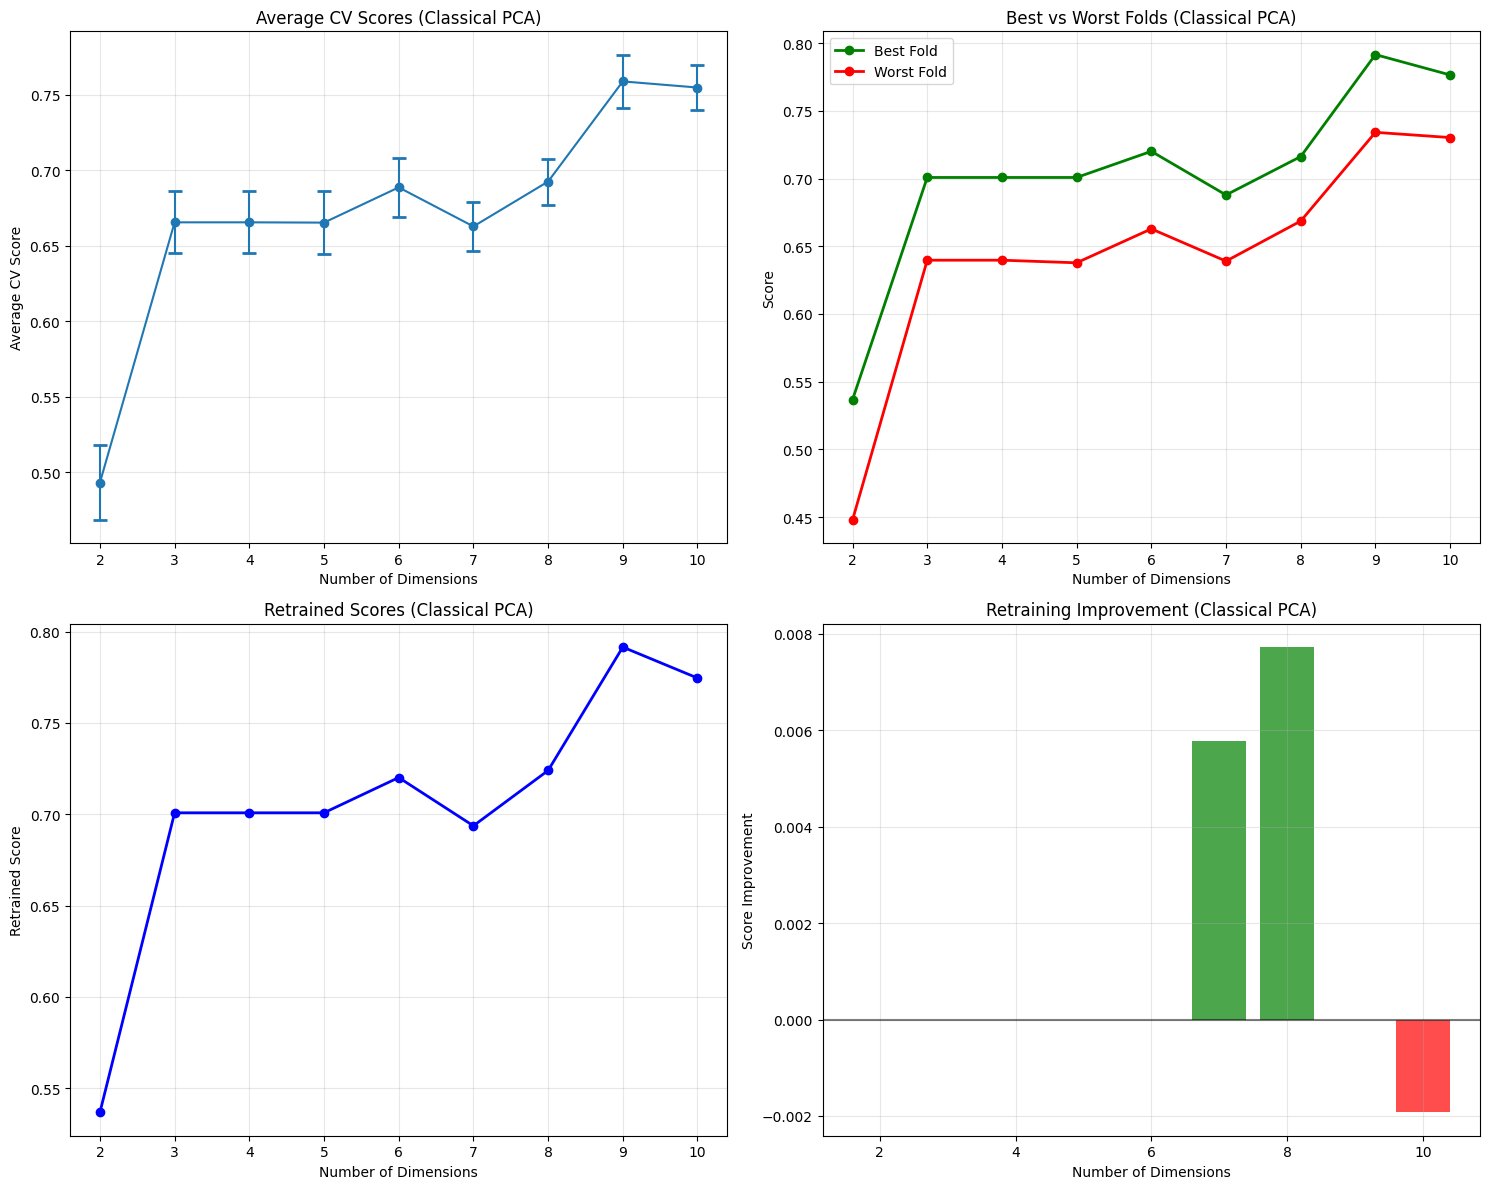


✅ Training complete! Check results/df_cpca.csv
📊 Total results in CSV: 99
📝 Created new file: results/df_qpca.csv
QPCA TRAINING WITH AUTO-RESUME
📁 CSV: results/df_qpca.csv

--- Evaluating 2D features: ['e_cblp', 'SizeOfCode'] ---
Fold Results:


KeyboardInterrupt: 

In [30]:
# Classical PCA (saves to df_cpca.csv)
evaluator_cpca = create_evaluator('cpca', quantum_available=False)
results_cpca = evaluator_cpca.main_with_resume(feature_2to10, df, y)

# Quantum PCA (saves to df_qpca.csv)
evaluator_qpca = create_evaluator('qpca', quantum_available=True)
results_qpca = evaluator_qpca.main_with_resume(feature_2to10, df, y)

# Quantum PCA + RBF (saves to df_qpca_rbf.csv)
evaluator_qpca_rbf = create_evaluator('qpca_rbf', quantum_available=True)
results_qpca_rbf = evaluator_qpca_rbf.main_with_resume(feature_2to10, df, y)

# Metrics of Evaluation

📂 Loaded 99 existing results from results/df_svc.csv
📂 Loaded 99 records from results/df_svc.csv

LOADED RESULTS SUMMARY
 n_clusters  best_fold_score  worst_fold_score  retrained_score  avg_cv_score  std_cv_score  improvement
          2         0.560694          0.494208         0.473988      0.527963      0.023504    -0.086705
          3         0.722543          0.679537         0.705202      0.697919      0.017325    -0.017341
          4         0.604247          0.537572         0.610039      0.575429      0.019204     0.005792
          5         0.725869          0.681467         0.731660      0.703514      0.017427     0.005792
          6         0.723938          0.676301         0.720077      0.700815      0.019586    -0.003861
          7         0.722543          0.679537         0.720617      0.699849      0.017175    -0.001927
          8         0.722008          0.677606         0.722008      0.699657      0.017817     0.000000
          9         0.723938          0

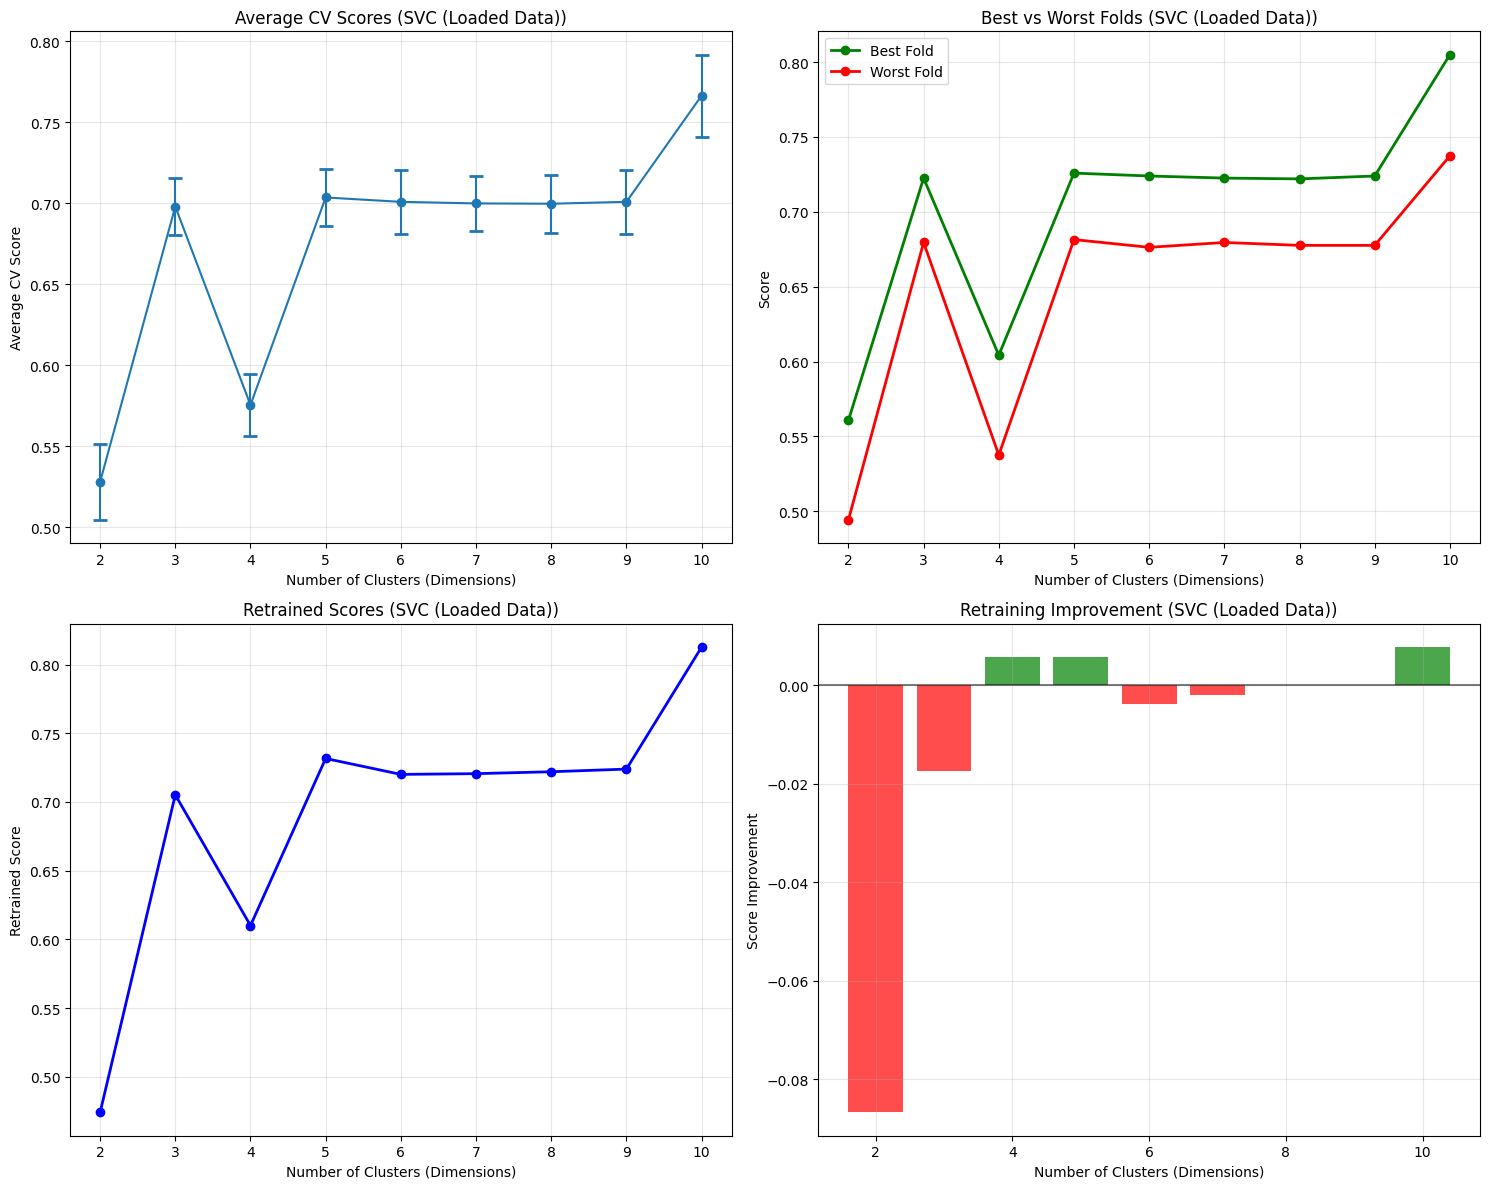

COMPARATIVE ANALYSIS: SVC vs QSVC
📂 Loaded 99 records from results/df_svc.csv
❌ File df_qsvc.csv not found!
❌ Could not load both datasets for comparison!


In [84]:
evaluator = ModelEvaluator()

# Single model analysis
svc_results = evaluator.load_data_plot("results/df_svc.csv")

# Comparative analysis  
evaluator.load_and_compare_models("results/df_svc.csv", "df_qsvc.csv")

In [ ]:
# Load and plot results
evaluator_cc.load_data_plot("results/df_cc.csv")  # Will show "Classical Clustering"
evaluator_qc.load_data_plot("results/df_qc.csv")  # Will show "Quantum Clustering"
evaluator_cpca.load_data_plot("results/df_cpca.csv")  # Will show "Classical PCA"
evaluator_qpca.load_data_plot("results/df_qpca.csv")  # Will show "Quantum PCA"
evaluator_qpca_rbf.load_data_plot("results/df_qpca_rbf.csv")  # Will show "Quantum PCA + RBF"

# For individual evaluation (single feature set)
# Classical clustering on specific feature set
evaluator_cc = create_evaluator('cc')
n_clusters = len(np.unique(y))  # Number of unique classes
results = evaluator_cc.evaluate_feature_set(df[feature_2to10[0]], y, n_clusters, 'CC')

# Quantum clustering on specific feature set  
evaluator_qc = create_evaluator('qc', quantum_available=True)
results = evaluator_qc.evaluate_feature_set(df[feature_2to10[0]], y, n_clusters, 'QC')

# Classical PCA on specific feature set
evaluator_cpca = create_evaluator('cpca')
results = evaluator_cpca.evaluate_feature_set(df[feature_2to10[0]], y, n_clusters, 'CPCA')

# Quantum PCA on specific feature set
evaluator_qpca = create_evaluator('qpca', quantum_available=True) 
results = evaluator_qpca.evaluate_feature_set(df[feature_2to10[0]], y, n_clusters, 'QPCA')

# Article Observations
* We are the first one to do an analogy in SCM and QML in a real quantum computer

Tougths:
* Fist is the dataset with highest corelations
* The problem is that we are doing feature selection based on the best features that are more corelated with our output. But we want to have features that are now as good to our output. Like the best corelated and the least corelated for example

Hipothesis:
- The results might be different
- Superconducting qubit with

- Get the time for predicting the test data

# Tutorial for ARC UTSA Supercomputer
#### Commands to enter in ARC UTSA
ssh ats852@arc.utsa.edu

srun -p compute1 -n 1 -t 00:30:00 --pty bash

module restore experiments

conda activate QML

#run the code

cd QML_in_SCM/src

python3 01_qml_in_scm.py

#### Vim Document
vim name_file.py            oppen file

a                           write file

ESC + dd                    delete the entire line

ESC + :w                    save the writing on file

ESC + :q                    close file

ESC + :wq                   save and close file